<a href="https://colab.research.google.com/github/sbeldine97/Market-Basket-Analysis-using-Apriori---FP-growth/blob/main/Consumer_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install prince
from prince import MCA
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
# Loading the datasets: June, Sept and Dec consumer basket survey

df_1 = pd.read_csv('https://raw.githubusercontent.com/sbeldine97/Dissertation/main/June_consumerbasketsurvey.csv')

df_2 = pd.read_csv('https://raw.githubusercontent.com/sbeldine97/Dissertation/main/Sept_consumerbasketsurvey.csv')

df_3 = pd.read_csv('https://raw.githubusercontent.com/sbeldine97/Dissertation/main/Dec_consumerbasketsurvey.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-084da4d4275e>:3: DtypeWarning: Columns (74) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('https://raw.githubusercontent.com/sbeldine97/Dissertation/main/June_consumerbasketsurvey.csv')


# Data Pre-processing






## Data Understanding

The data is made up of a number of a number of columns:
1. The period
2. The code - unique identifier of the responses
3. Demographics - survey respondent's profile
   *   Gender
   *   Age-group
   *   Marital Status
   *   Highest Educational Level
   *   Occupation
   *   Household with children
   *   Household size
   *   Income level
   
The next section is based on the items consumers surveyed purchased on a monthly basis.

4. Which of the following Home Care products have you purchased in the past month?

      * Dishwashing liquid
      * Dishwasher detergent
      * General cleaning barsoap
      * Floor cleaner(liquid)
      * Floor cleaner (wax)
      * Carpet cleaner
      * Furniture cleaner
      * Shower cleaner
      * Toilet paper
      * Toilet cleaner
      * Laundry detergent
      * Bleach
      * Air freshener

5. Which of the following Personal Care products have you purchased in the past month?

      * Hand Sanitizer
      * Hand Wash
      * Bath Soap
      * Body Wash/Shower gel
      * Deodorant/Body spray
      * Roll-on/ Antiperspirant
      * Body lotion
      * Petroleum Jelly e.g. Vaseline
      * Facial cleanser
      * Face cream/moisturizer
      * Eye cream
      * Sunscreen
      * Perfume
      * Lipgloss
      * Toothpaste
      * Mouthwash

6. Which of the following Dry Foods have you purchased in the past month?
      * Breakfast Cereal
      * Flour
      * Pasta
      * Noodles
      * Rice
      * Bread Rolls or Pastries
      * Ready-to-make baked goods
      * Traditional staple foods
      * Spices and Seasonings
      * Cooking oil
7. Which of the following types of Fruit and Vegetables have you purchased in the past month?
      * Fresh fruits
      * Fresh vegetables
      * Canned fruit
      * Canned vegetables (e.g. mushrooms)
      * Frozen fruit
      * Frozen vegetables
      * Canned tomatoes
8. Which of the following types of Beans or Legumes have you purchased in the past month?
      * Canned beans
      * Baked beans
      * Canned peas
      * Canned chickpeas or lentils
      * Dried beans
      * Dried peas or lentils
9. Which of the following types of Meat or Fish have you purchased in the past month?
      * Fresh red meat
      * Fresh poultry
      * Fresh fish
      * Frozen meat
      * Frozen fish
      * Seafood
      * Canned meat
      * Canned fish
10. Which of the following types of Protein foods have you purchased in the past month?
      * Eggs
      * Cheese
      * Tofu
      * Yoghurt
11. Which of the following types of Snacks have you purchased in the past month?
      * Chocolates
      * Sweets
      * Biscuits/Cookies
      * Chips/Crisps
      * Nuts
      * Dried fruits
12. Which of the following types of Beverages have you purchased in the past month?
      * Tea
      * Coffee
      * Fruit juice
      * Bottled water
      * Milk
      * Carbornated soft drinks
      * Diet soft drinks
      * Iced tea drinks
      * Energy drinks
      * Sports drinks
      * Smoothies
      * Concentrated juice

13. Which of the following types of Alcoholic Beverages have you purchased in the past month?
      * Wine
      * Beer
      * Ciders
      * Champagne/Sparkling wine
      * Vodka
      * Brandy
      * Whisky
      * Gin
      * Rum
      * Tequila
      * Cream Liqueurs


### Combining the datasets
Since the datasets are same, the three datasets will be combined then data pre-processing will start.

In [ ]:
# Combining the datasets into a single DataFrame
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(62187, 105)

In [ ]:
#Cleaning each dataset on its own before combining the three
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Period 0. Enter your code 9. Gender 10. Marital status 11. Age-group  \
0  Jun-23           K10R38b8      Male            Married         Gen Z   
1  Jun-23           D39R38a7    Female             Dating         Gen Z   
2  Jun-23           Z5R38b15    Female            Married         Gen Z   
3  Jun-23            K9R38b4    Female             Dating         Gen Z   
4  Jun-23           K9R38b11    Female             Single         Gen Z   

  12. Whats your highest level of education?     13. Occupation  \
0                          University degree  Salaried employee   
1                        Vocational training  Salaried employee   
2                          University degree  Salaried employee   
3                          University degree  Salaried employee   
4                          University degree  Salaried employee   

  15. Do you have any children under the age of 18 years living in your home?  \
0                                                Yes                            
1                                                 No                            
2                                                Yes                            
3                                                Yes                            
4                                                Yes                            

  16. What is the size of your household (number of people in the family)?  \
0                                      3 or 4 people                         
1                                      3 or 4 people                         
2                                      5 or 6 people                         
3                                      5 or 6 people                         
4                                      3 or 4 people                         

            17. Country of Residence  ... Beer Ciders  \
0  DRC- Democratic republic of Congo  ...   No     No   
1                           Cameroon  ...  Yes     No   
2                             Zambia  ...  Yes     No   
3  DRC- Democratic republic of Congo  ...  Yes     No   
4  DRC- Democratic republic of Congo  ...  Yes     No   

  Champagne/Sparkling wine Vodka Brandy Whisky Gin Rum Tequila Cream Liqueurs   
0                       No    No     No     No  No  No      No              No  
1                       No    No     No     No  No  No      No              No  
2                       No   Yes    Yes     No  No  No      No              No  
3                      Yes    No     No     No  No  No      No              No  
4                      Yes    No     No     No  No  No      No              No  

[5 rows x 105 columns]

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(62187, 105)

The combined dataset has 62187 rows and 105 columns

In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Period', '0. Enter your code', '9. Gender', '10. Marital status',
       '11. Age-group', '12. Whats your highest level of education?',
       '13. Occupation',
       '15. Do you have any children under the age of 18 years living in your home?',
       '16. What is the size of your household (number of people in the family)?',
       '17. Country of Residence',
       ...
       'Beer', 'Ciders', 'Champagne/Sparkling wine', 'Vodka', 'Brandy',
       'Whisky', 'Gin', 'Rum', 'Tequila', 'Cream Liqueurs '],
      dtype='object', length=105)

In [ ]:
#Renaming columns so that the data looks presentable
column_rename_map = {
    '0. Enter your code': 'Code','9. Gender':'Gender', '10. Marital status': 'Marital status', '11. Age-group':'Age-group','12. Whats your highest level of education?':'Education level',
    '13. Occupation':'Occupation', '15. Do you have any children under the age of 18 years living in your home?':'Household with children under 18', '16. What is the size of your household (number of people in the family)?':'Household size',
    '17. Country of Residence':'Country','18. What would you say is the COMBINED TOTAL amount of money that everyone in the household earns on an average month after tax? ':'Income'

}

# Rename the columns
df.rename(columns=column_rename_map, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Period', 'Code', 'Gender', 'Marital status', 'Age-group',
       'Education level', 'Occupation', 'Household with children under 18',
       'Household size', 'Country',
       ...
       'Beer', 'Ciders', 'Champagne/Sparkling wine', 'Vodka', 'Brandy',
       'Whisky', 'Gin', 'Rum', 'Tequila', 'Cream Liqueurs '],
      dtype='object', length=105)

### Checking Missing Values

In [ ]:
# Find columns with missing values
columns_with_missing_values = df.columns[df.isna().any()].tolist()

# Print the names of columns with missing values
print(columns_with_missing_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Seafood', 'Canned meat', 'Canned fish', 'Tofu', 'Sweets', 'Biscuits', 'Crisps', 'Nuts', 'Dried fruits', 'Energy drinks', 'Sports drinks', 'Smoothies', 'Concentrated juice']


In [ ]:
# Find the number of missing values in each column
missing_values_count = df.isna().sum()

# Filter out columns that have at least one missing value
missing_values_in_columns = missing_values_count[missing_values_count > 0]

# Display the count of missing values in each of the identified columns
print(missing_values_in_columns)

Seafood                6548
Canned meat            7065
Canned fish            7065
Tofu                  22883
Sweets                    3
Biscuits                  3
Crisps                    3
Nuts                      3
Dried fruits              3
Energy drinks             3
Sports drinks             3
Smoothies                 3
Concentrated juice        3
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Drop columns with more than 10,000 missing values
df = df.drop(columns=df.columns[(df.isna().sum() > 10000)])

# For the remaining columns, fill missing values with the mode of the column
# We use mode()[0] to select the first mode value in case there are multiple modes.
# If the mode calculation results in an empty series, we won't fill with the mode.
for column in df.columns:
    if not df[column].mode().empty:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Verify if the operation was successful
remaining_missing_values = df.isna().sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Period        Code  Gender Marital status    Age-group  \
0  Jun-23    K10R38b8    Male        Married        Gen Z   
1  Jun-23    D39R38a7  Female         Dating        Gen Z   
2  Jun-23    Z5R38b15  Female        Married        Gen Z   
3  Jun-23     K9R38b4  Female         Dating        Gen Z   
4  Jun-23    K9R38b11  Female         Single        Gen Z   
5  Jun-23   AB24R38b5    Male         Single        Gen Z   
6  Jun-23  AC30R38a14    Male        Married  Millennials   
7  Jun-23  AC30R38a29  Female        Married        Gen Z   
8  Jun-23   L16R38b11    Male         Single  Millennials   
9  Jun-23   T10R38b13    Male         Dating        Gen Z   

       Education level         Occupation Household with children under 18  \
0    University degree  Salaried employee                              Yes   
1  Vocational training  Salaried employee                               No   
2    University degree  Salaried employee                              Yes   
3    University degree  Salaried employee                              Yes   
4    University degree  Salaried employee                              Yes   
5          High school            Student                               No   
6    University degree  Salaried employee                              Yes   
7    University degree  Salaried employee                              Yes   
8    University degree     Business owner                              Yes   
9              Diploma  Salaried employee                              Yes   

   Household size                            Country  ... Beer Ciders  \
0   3 or 4 people  DRC- Democratic republic of Congo  ...   No     No   
1   3 or 4 people                           Cameroon  ...  Yes     No   
2   5 or 6 people                             Zambia  ...  Yes     No   
3   5 or 6 people  DRC- Democratic republic of Congo  ...  Yes     No   
4   3 or 4 people  DRC- Democratic republic of Congo  ...  Yes     No   
5  Up to 2 people                        Ivory Coast  ...  Yes     No   
6  Up to 2 people                              Ghana  ...  Yes     No   
7  Up to 2 people                              Ghana  ...  Yes     No   
8   3 or 4 people                            Nigeria  ...   No     No   
9  Up to 2 people                           Tanzania  ...  Yes    Yes   

  Champagne/Sparkling wine Vodka Brandy Whisky  Gin  Rum Tequila  \
0                       No    No     No     No   No   No      No   
1                       No    No     No     No   No   No      No   
2                       No   Yes    Yes     No   No   No      No   
3                      Yes    No     No     No   No   No      No   
4                      Yes    No     No     No   No   No      No   
5                      Yes    No     No     No   No   No      No   
6                       No    No     No     No   No   No      No   
7                       No    No     No     No   No   No      No   
8                       No    No     No     No   No   No      No   
9                       No   Yes     No     No  Yes  Yes      No   

  Cream Liqueurs   
0              No  
1              No  
2              No  
3              No  
4              No  
5              No  
6              No  
7              No  
8              No  
9              No  

[10 rows x 104 columns]

### Duplicate Values

In [ ]:
# Check for duplicates in the 'Code' column
duplicates = df['Code'].duplicated(keep=False)

# Display the duplicates if there are any, otherwise print that there are no duplicates
if duplicates.any():
    print("Duplicates found in 'Code' column:")
    df_duplicates = df[duplicates]
    print(df_duplicates)
else:
    print("No duplicates found in the 'Code' column.")


Duplicates found in 'Code' column:
       Period        Code  Gender              Marital status    Age-group  \
425    Jun-23    R11R38b1    Male                     Married        Gen Z   
1168   Jun-23    M9R38b20  Female                      Dating        Gen Z   
2694   Jun-23  AC27R38a55  Female                     Married  Millennials   
4026   Jun-23  AC27R38a56    Male  Divorced/Separated/Widowed  Millennials   
4161   Jun-23    R15R38b1  Female                     Married        Gen Z   
4653   Jun-23  AC27R38a56    Male                      Single  Millennials   
5174   Jun-23   CA8R38b12  Female                     Married  Millennials   
5225   Jun-23   CA8R38b12    Male                     Married  Millennials   
6076   Jun-23  AC27R38a55  Female                  Cohabiting  Millennials   
6793   Jun-23    R15R38b1    Male                     Married        Gen Z   
6997   Jun-23    M9R38b20    Male                      Dating        Gen Z   
7587   Jun-23    R11R38b1  Fe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Drop duplicates based on the 'Code' column, keeping the first occurrence
df_cleaned = df.drop_duplicates(subset='Code', keep='first')

# Check for duplicates again to confirm they have been dropped
duplicates_after_cleaning = df_cleaned['Code'].duplicated().any()

# If no duplicates are found, print the message
if not duplicates_after_cleaning:
    print("No duplicates found in the 'Code' column after cleaning.")
else:
    # This should not happen since duplicates are expected to be dropped,
    # but it's here to catch any unexpected issues.
    print("There are still duplicates in the 'Code' column.")

No duplicates found in the 'Code' column after cleaning.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_cleaned.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(62176, 104)

In [ ]:
df_cleaned.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Period             object
Code               object
Gender             object
Marital status     object
Age-group          object
                    ...  
Whisky             object
Gin                object
Rum                object
Tequila            object
Cream Liqueurs     object
Length: 104, dtype: object

### Outlier Detection

In [ ]:
print(df_cleaned.columns.tolist())

['Period', 'Code', 'Gender', 'Marital status', 'Age-group', 'Education level', 'Occupation', 'Household with children under 18', 'Household size', 'Country', 'Income', 'Dishwashing liquid', 'Dishwasher detergent', 'General cleaning bar soap', 'Floor cleaner (liquid)', 'Floor cleaner (wax)', 'Carpet cleaner', 'Furniture cleaner', 'Shower cleaner', 'Toilet paper', 'Toilet cleaner', 'Laundry detergent ', 'Bleach', 'Air Freshener', 'Hand sanitizer', 'Hand wash', 'Bath soap', 'Body wash', 'Deodorant', 'Antiperspirant', 'Body lotion', 'Petroleum Jelly', 'Facial cleanser', 'Face cream', 'Eye cream', 'Sunscreen', 'Perfume', 'Lipgloss', 'Toothpaste', 'Mouthwash', 'Breakfast Cereal', 'Flour', 'Pasta', 'Noodles', 'Rice', 'Bread', 'Rolls or Pastries', 'Ready-to-make baked goods ', 'Traditional staple foods', 'Spices and Seasonings', 'Cooking oil', 'Fresh fruits', 'Fresh vegetables', 'Canned fruit', 'Canned vegetables', 'Frozen fruit', 'Frozen vegetables', 'Canned tomatoes', 'Canned beans', 'Baked 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# We'll use a low frequency threshold to identify rare categories.
# This is somewhat arbitrary and you can adjust this threshold according to your needs.
frequency_threshold = 50

# Let's assume 'data' is your DataFrame and 'categorical_columns' is a list of categorical column names.
categorical_columns = ['Dishwashing liquid', 'Dishwasher detergent', 'General cleaning bar soap', 'Floor cleaner (liquid)', 'Floor cleaner (wax)', 'Carpet cleaner', 'Furniture cleaner', 'Shower cleaner',
    'Toilet paper', 'Toilet cleaner', 'Laundry detergent ', 'Bleach', 'Air Freshener', 'Hand sanitizer', 'Hand wash', 'Bath soap', 'Body wash', 'Deodorant', 'Antiperspirant', 'Body lotion',
    'Petroleum Jelly', 'Facial cleanser', 'Face cream', 'Eye cream', 'Sunscreen', 'Perfume', 'Lipgloss', 'Toothpaste', 'Mouthwash', 'Breakfast Cereal', 'Flour', 'Pasta', 'Noodles', 'Rice', 'Bread',
    'Rolls or Pastries', 'Ready-to-make baked goods ', 'Traditional staple foods', 'Spices and Seasonings', 'Cooking oil', 'Fresh fruits', 'Fresh vegetables', 'Canned fruit', 'Canned vegetables',
    'Frozen fruit', 'Frozen vegetables', 'Canned tomatoes', 'Canned beans', 'Baked beans', 'Canned peas', 'Canned chickpeas or lentils', 'Dried beans', 'Dried peas or lentils', 'Fresh red meat ',
    'Fresh poultry ', 'Fresh fish', 'Frozen meat', 'Frozen fish', 'Seafood', 'Canned meat', 'Canned fish', 'Eggs', 'Cheese', 'Yoghurt', 'Chocolates', 'Sweets', 'Biscuits', 'Crisps', 'Nuts',
    'Dried fruits', 'Tea', 'Coffee', 'Fruit juice', 'Bottled water', 'Milk', 'Carbonated soft drinks', 'Diet soft drinks', 'Iced tea drinks', 'Energy drinks', 'Sports drinks', 'Smoothies',
    'Concentrated juice', 'Wine', 'Beer', 'Ciders', 'Champagne/Sparkling wine', 'Vodka', 'Brandy', 'Whisky', 'Gin', 'Rum', 'Tequila', 'Cream Liqueurs ']

# Dictionary to hold potential outliers (rare categories)
rare_categories = {}

# Analyze each categorical column
for column in categorical_columns:
    # Count the frequency of each category in the column
    frequency_count = df_cleaned[column].value_counts()
    # Identify the categories that occur less frequently than the threshold
    rare = frequency_count[frequency_count < frequency_threshold].index.tolist()
    # If there are rare categories, add them to the dictionary
    if rare:
        rare_categories[column] = rare

# Output the rare categories
rare_categories

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Lipgloss': [' No']}

There were no outliers detected in the dataset

In [ ]:
# Converting the items purchased columns to boolean
yes_no_columns = [
    'Dishwashing liquid', 'Dishwasher detergent', 'General cleaning bar soap', 'Floor cleaner (liquid)', 'Floor cleaner (wax)', 'Carpet cleaner', 'Furniture cleaner', 'Shower cleaner',
    'Toilet paper', 'Toilet cleaner', 'Laundry detergent ', 'Bleach', 'Air Freshener', 'Hand sanitizer', 'Hand wash', 'Bath soap', 'Body wash', 'Deodorant', 'Antiperspirant', 'Body lotion',
    'Petroleum Jelly', 'Facial cleanser', 'Face cream', 'Eye cream', 'Sunscreen', 'Perfume', 'Lipgloss', 'Toothpaste', 'Mouthwash', 'Breakfast Cereal', 'Flour', 'Pasta', 'Noodles', 'Rice', 'Bread',
    'Rolls or Pastries', 'Ready-to-make baked goods ', 'Traditional staple foods', 'Spices and Seasonings', 'Cooking oil', 'Fresh fruits', 'Fresh vegetables', 'Canned fruit', 'Canned vegetables',
    'Frozen fruit', 'Frozen vegetables', 'Canned tomatoes', 'Canned beans', 'Baked beans', 'Canned peas', 'Canned chickpeas or lentils', 'Dried beans', 'Dried peas or lentils', 'Fresh red meat ',
    'Fresh poultry ', 'Fresh fish', 'Frozen meat', 'Frozen fish', 'Seafood', 'Canned meat', 'Canned fish', 'Eggs', 'Cheese', 'Yoghurt', 'Chocolates', 'Sweets', 'Biscuits', 'Crisps', 'Nuts',
    'Dried fruits', 'Tea', 'Coffee', 'Fruit juice', 'Bottled water', 'Milk', 'Carbonated soft drinks', 'Diet soft drinks', 'Iced tea drinks', 'Energy drinks', 'Sports drinks', 'Smoothies',
    'Concentrated juice', 'Wine', 'Beer', 'Ciders', 'Champagne/Sparkling wine', 'Vodka', 'Brandy', 'Whisky', 'Gin', 'Rum', 'Tequila', 'Cream Liqueurs '
]

# Convert each column to boolean
for col in yes_no_columns:
   df_cleaned[col] = df_cleaned[col].map({'Yes': True, 'No': False}).astype(bool)

# Verify the conversion
print(df_cleaned[yes_no_columns].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-1fdb71eed2bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].map({'Yes': True, 'No': False}).astype(bool)
<ipython-input-20-1fdb71eed2bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

   Dishwashing liquid  Dishwasher detergent  General cleaning bar soap  \
0               False                 False                       True   
1               False                 False                      False   
2               False                 False                       True   
3               False                 False                       True   
4               False                 False                       True   

   Floor cleaner (liquid)  Floor cleaner (wax)  Carpet cleaner  \
0                   False                False           False   
1                   False                False           False   
2                   False                False           False   
3                   False                False           False   
4                   False                False           False   

   Furniture cleaner  Shower cleaner  Toilet paper  Toilet cleaner  ...  \
0              False           False          True           False  ...   
1       

<ipython-input-20-1fdb71eed2bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].map({'Yes': True, 'No': False}).astype(bool)
<ipython-input-20-1fdb71eed2bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].map({'Yes': True, 'No': False}).astype(bool)
<ipython-input-20-1fdb71eed2bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
data = df_cleaned.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Exploratory Data Analysis

In [ ]:
##Value counts of country
data.Country.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Country
South Africa                         4569
Ghana                                4436
Nigeria                              4397
Tanzania                             4314
Ivory Coast                          4305
Cameroon                             4299
Kenya                                4220
DRC- Democratic republic of Congo    3594
Tunisia                              3500
Senegal                              3425
Morocco                              3332
Egypt                                3124
Namibia                              3123
Zambia                               3039
Algeria                              2924
Congo                                2916
Mozambique                           2659
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


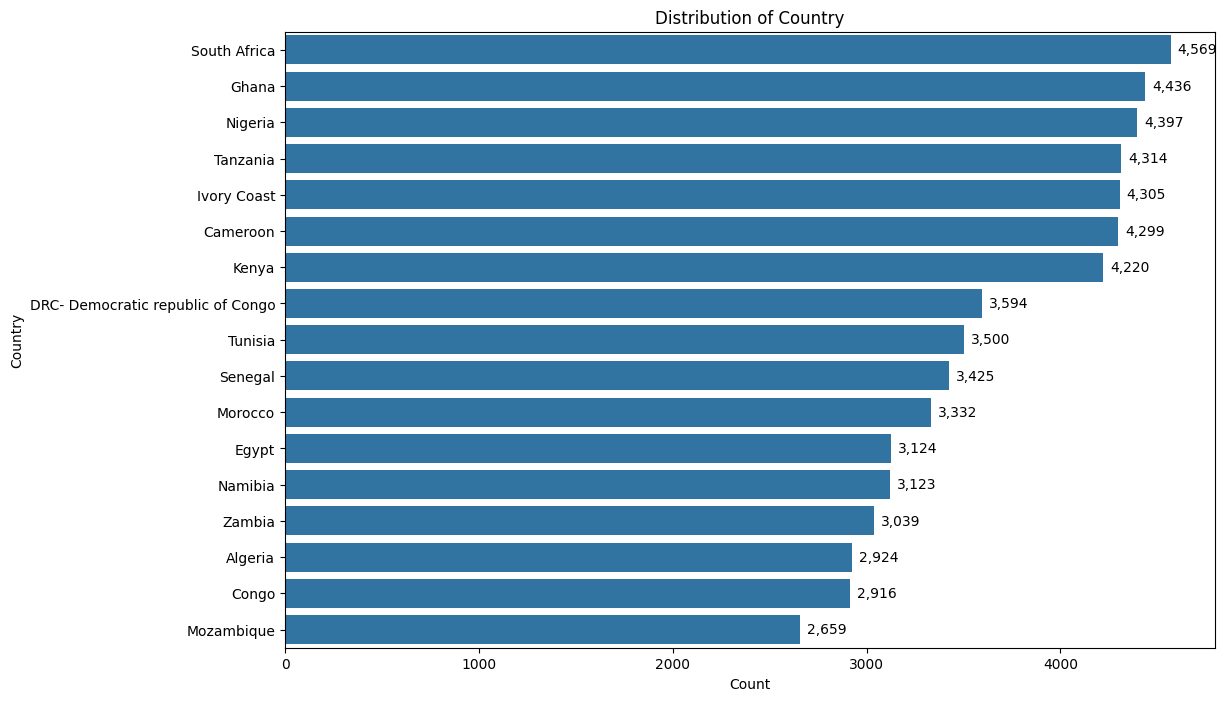

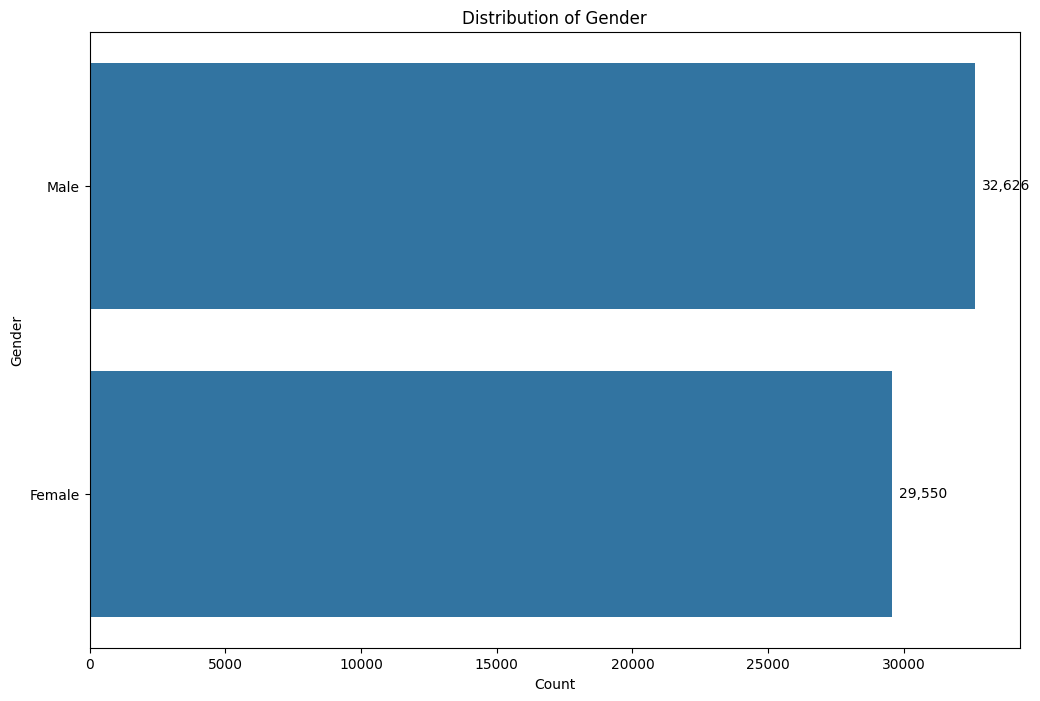

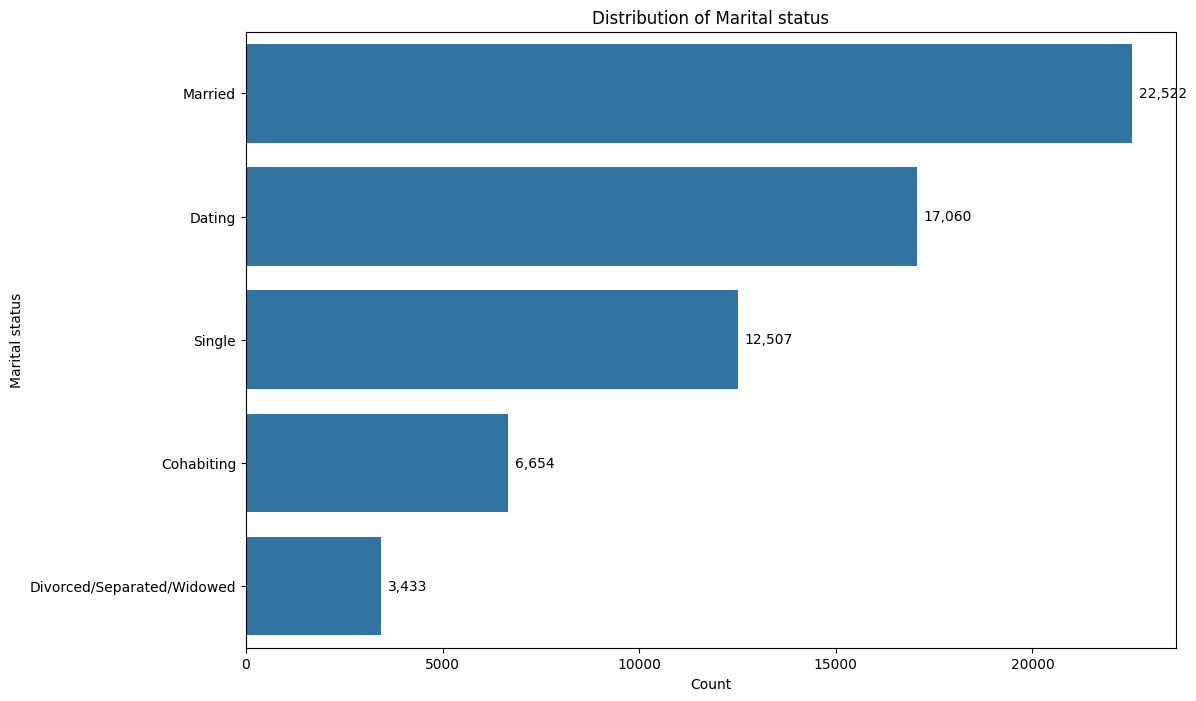

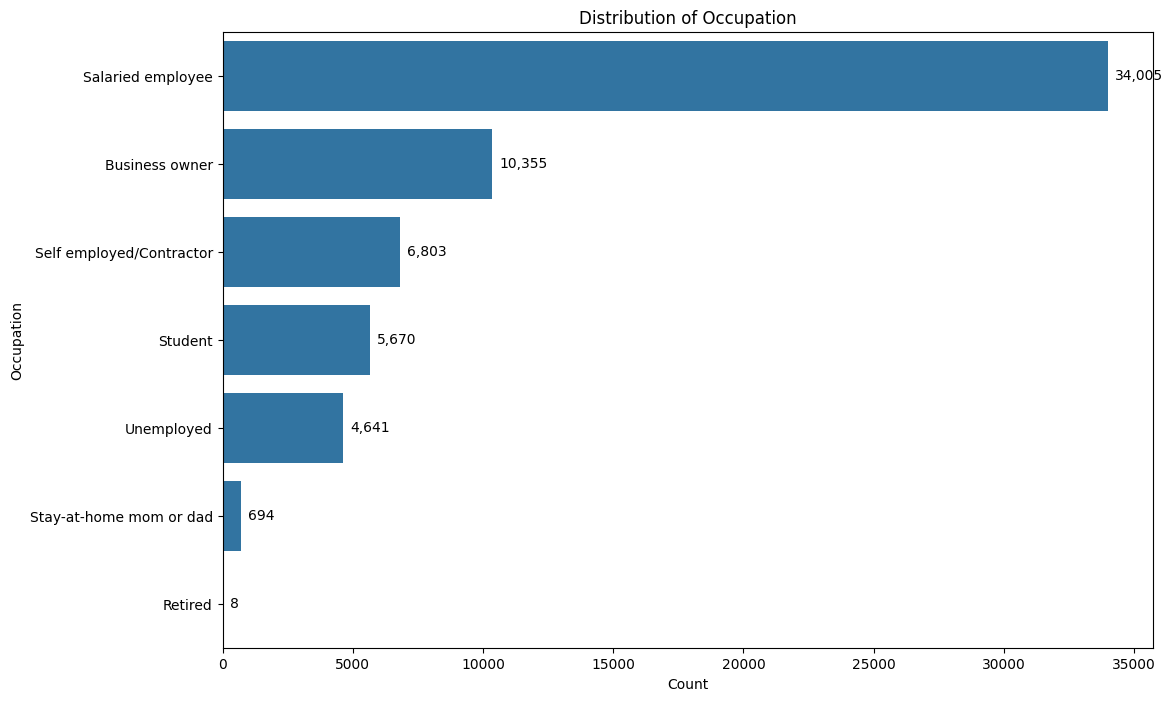

In [ ]:

# Visualizing value counts for demographic columns: 'Country', 'Gender', 'Marital status', and 'Occupation'
demographic_columns = ['Country', 'Gender', 'Marital status', 'Occupation']
for column in demographic_columns:
    plt.figure(figsize=(12, 8))
    order = data[column].value_counts().index
    ax = sns.countplot(y=column, data=data, order=order)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width()):,}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


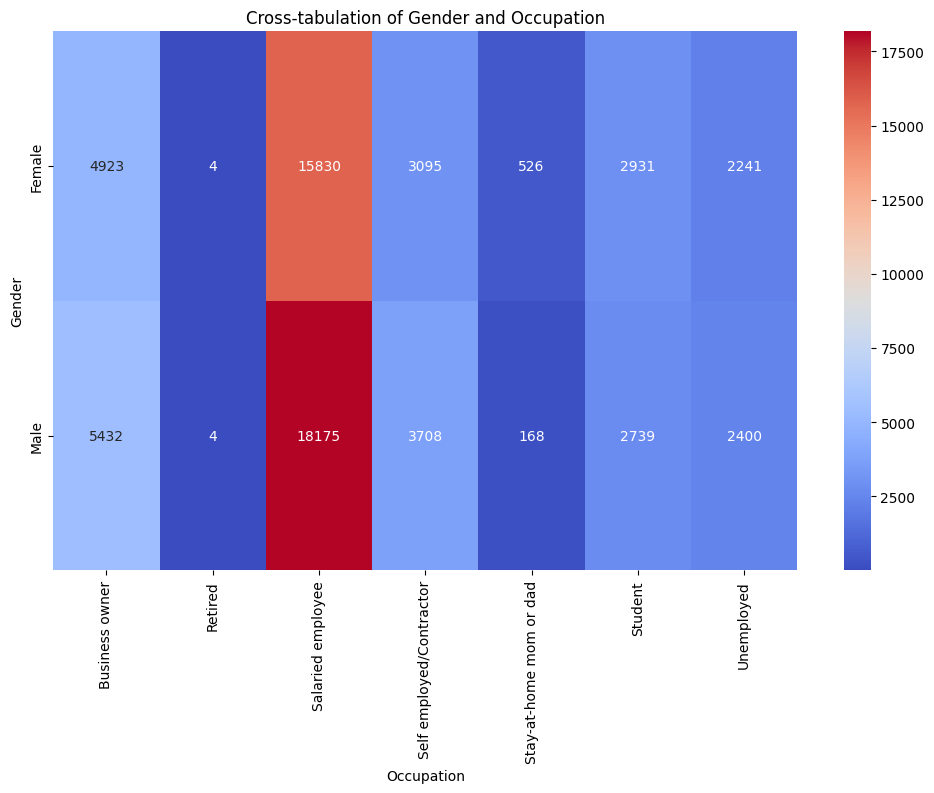

In [ ]:
# Using cross-tabulation to analyze the relationship between 'Gender' and 'Occupation'
gender_occupation_crosstab = pd.crosstab(data['Gender'], data['Occupation'])
plt.figure(figsize=(12, 7))
sns.heatmap(gender_occupation_crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Cross-tabulation of Gender and Occupation')
plt.xlabel('Occupation')
plt.ylabel('Gender')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


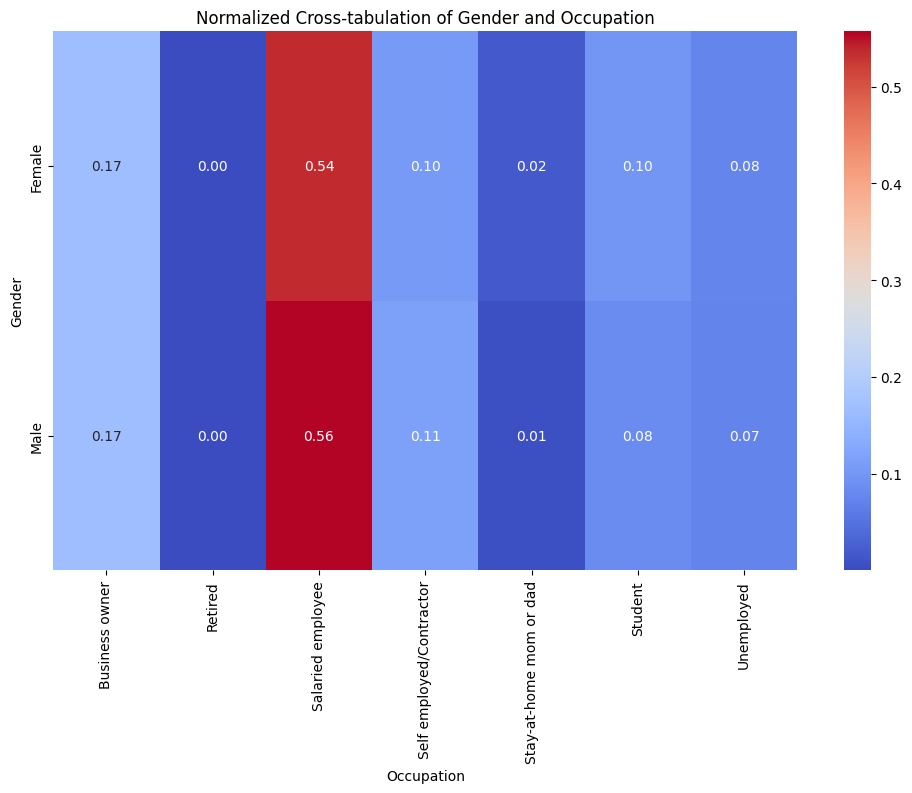

In [ ]:
# Normalized cross-tabulation for Gender and Occupation
gender_occupation_crosstab_normalized = pd.crosstab(data['Gender'], data['Occupation'], normalize='index')
plt.figure(figsize=(12, 7))
sns.heatmap(gender_occupation_crosstab_normalized, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Normalized Cross-tabulation of Gender and Occupation')
plt.xlabel('Occupation')
plt.ylabel('Gender')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


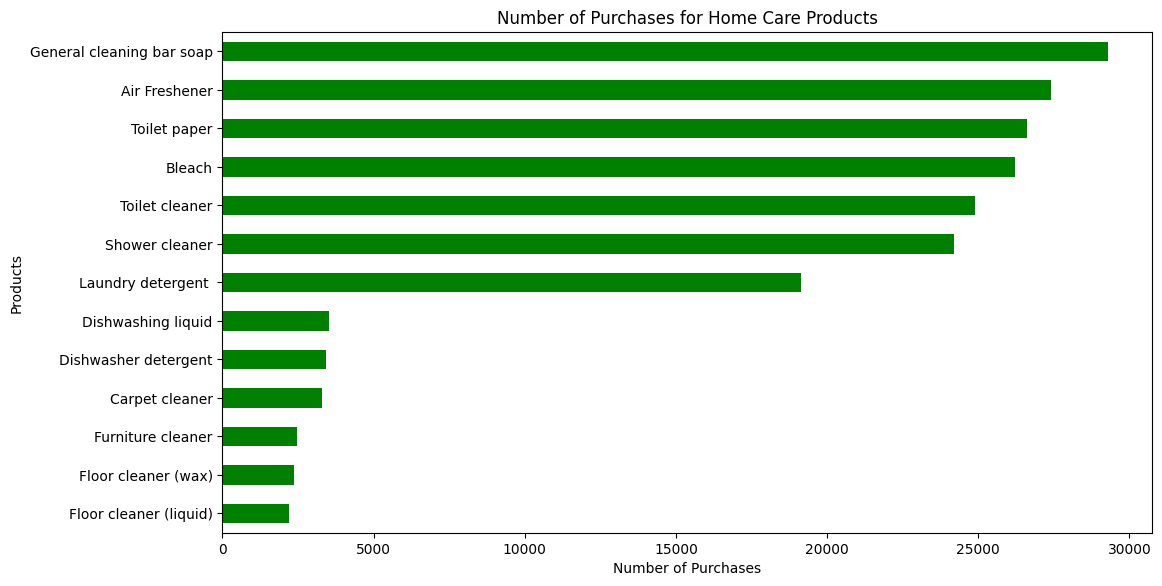

Average number of purchases in Home Care Products: 14999.62


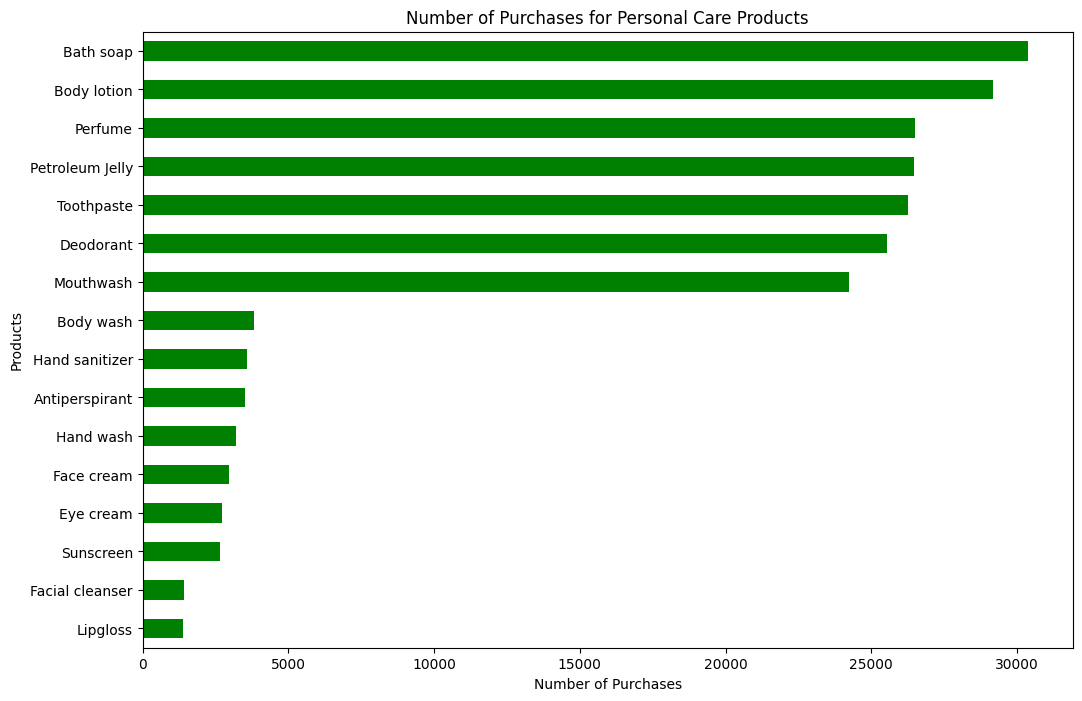

Average number of purchases in Personal Care Products: 13357.81


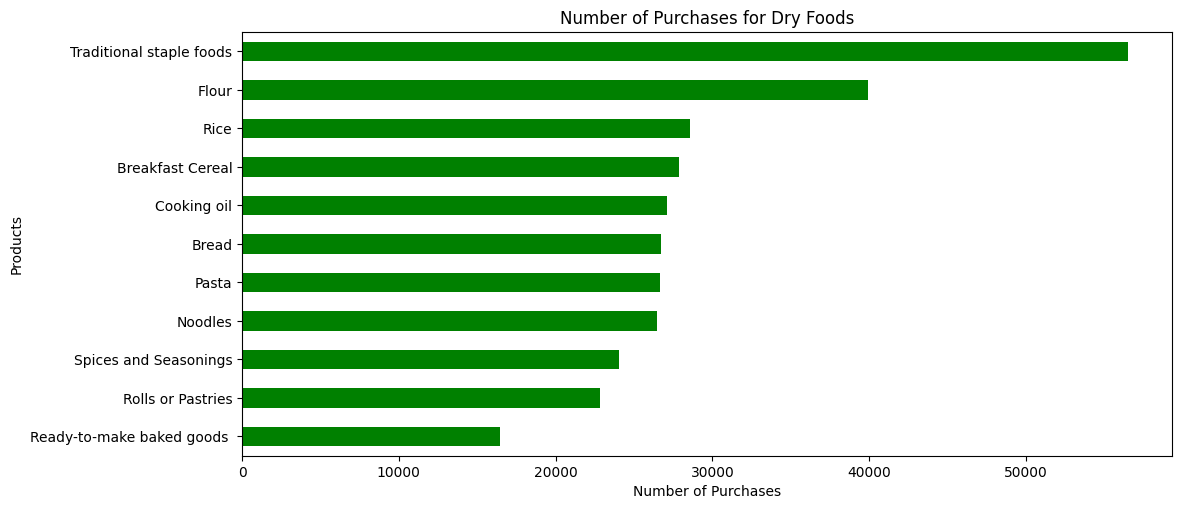

Average number of purchases in Dry Foods: 29378.00


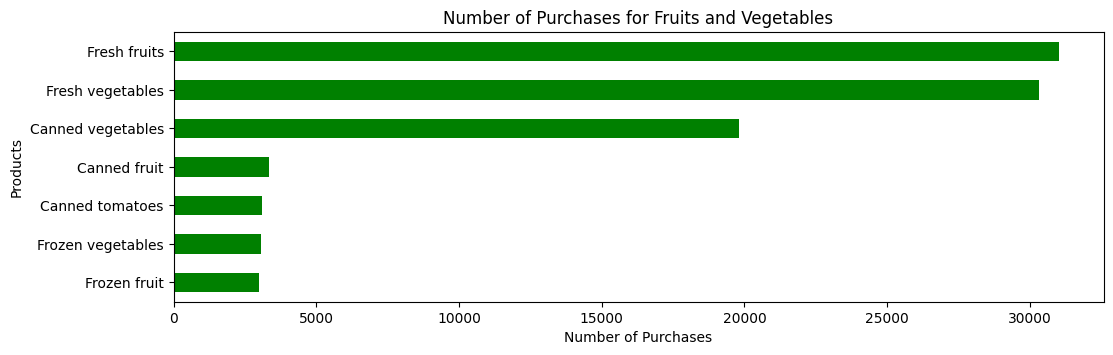

Average number of purchases in Fruits and Vegetables: 13381.29


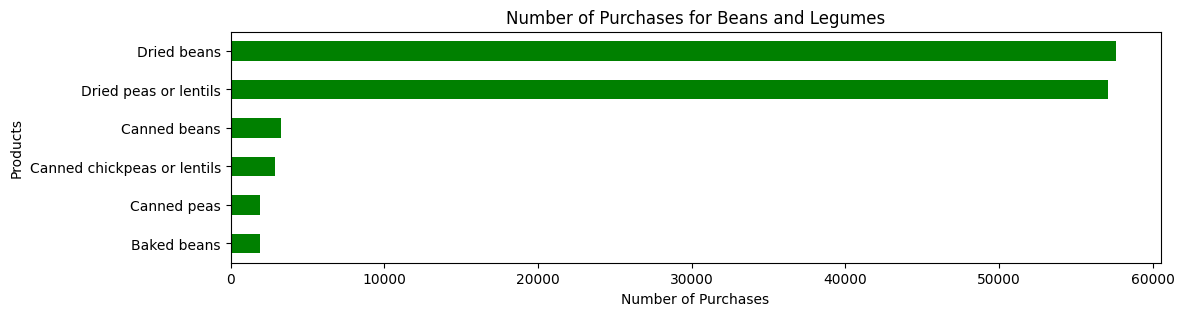

Average number of purchases in Beans and Legumes: 20802.17


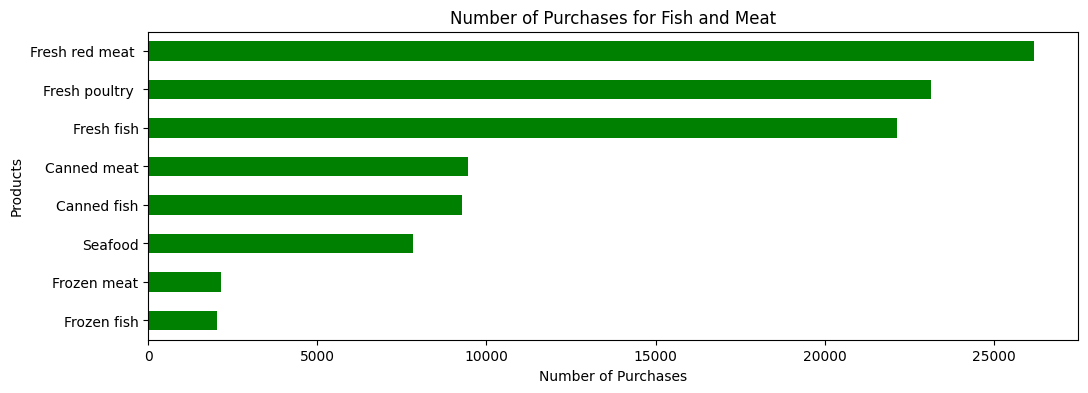

Average number of purchases in Fish and Meat: 12772.50


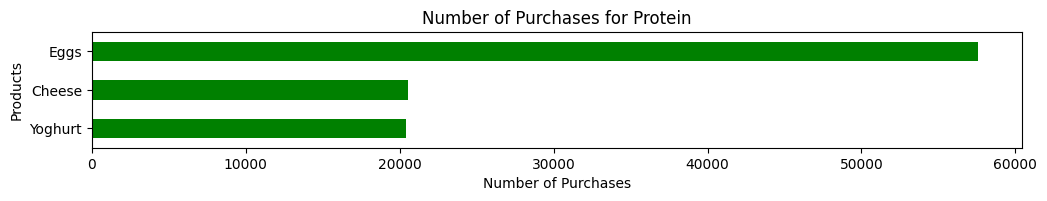

Average number of purchases in Protein: 32841.00


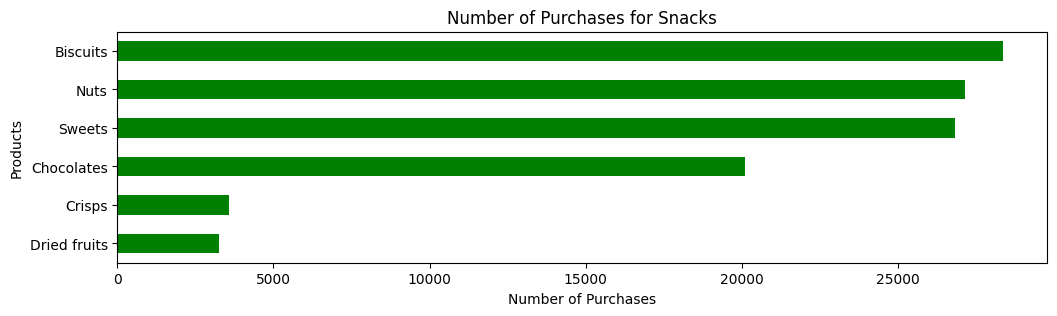

Average number of purchases in Snacks: 18216.17


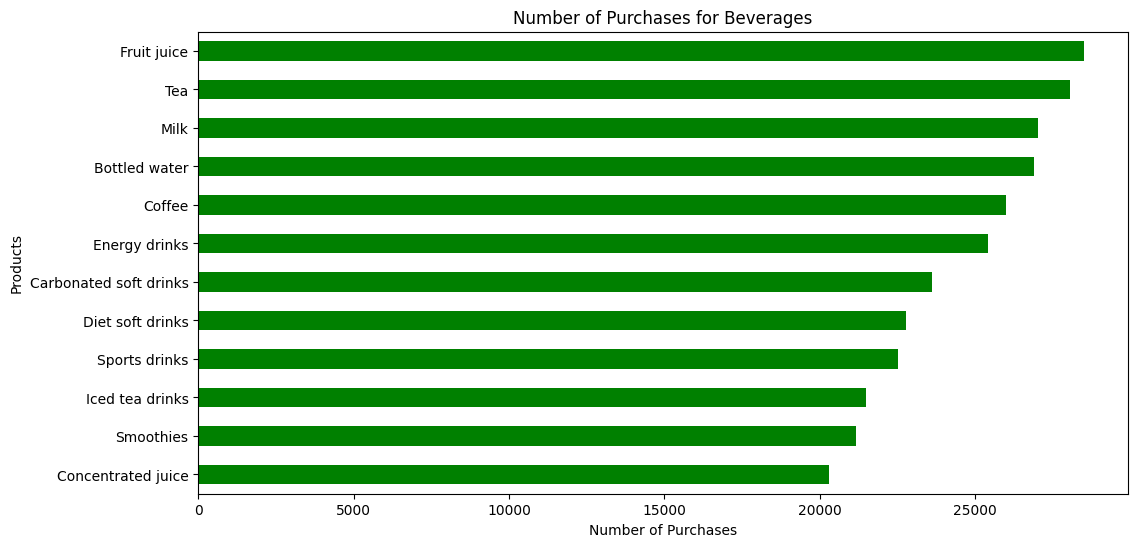

Average number of purchases in Beverages: 24484.42


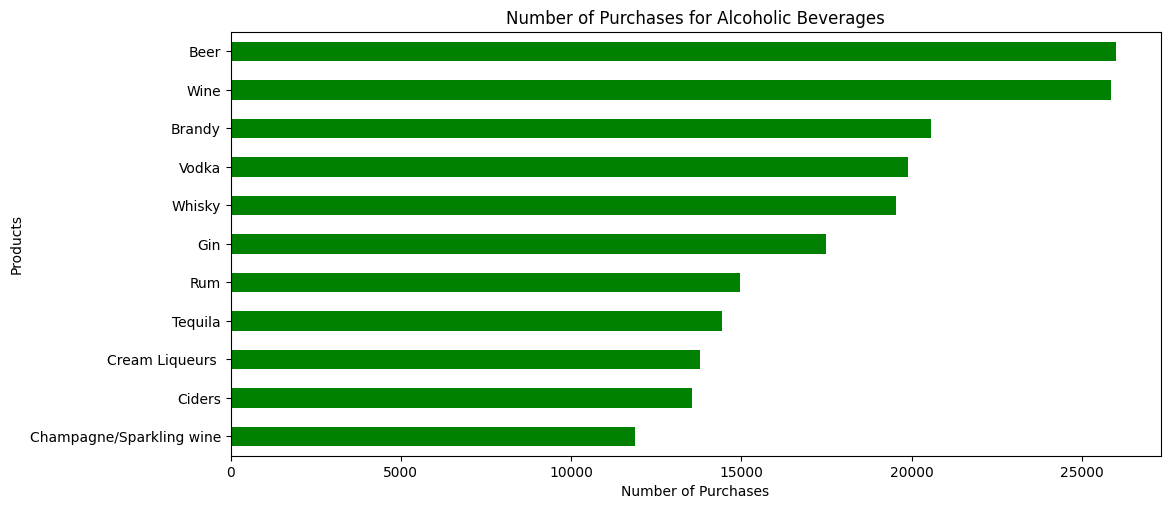

Average number of purchases in Alcoholic Beverages: 17994.45


In [ ]:
# Grouping items into categories and visualizing the count of 'True' responses for purchases
# The assumption here is that the response 'True' means the item was purchased while 'False' means the item was not purchased

# Define product categories as lists
home_care_products = [
    'Dishwashing liquid', 'Dishwasher detergent', 'General cleaning bar soap',
    'Floor cleaner (liquid)', 'Floor cleaner (wax)', 'Carpet cleaner', 'Furniture cleaner',
    'Shower cleaner','Toilet paper', 'Toilet cleaner', 'Laundry detergent ', 'Bleach', 'Air Freshener'
]

personal_care_products = [
    'Hand sanitizer', 'Hand wash', 'Bath soap', 'Body wash', 'Deodorant',
    'Antiperspirant', 'Body lotion','Petroleum Jelly', 'Facial cleanser',
    'Face cream', 'Eye cream', 'Sunscreen', 'Perfume', 'Lipgloss',
    'Toothpaste', 'Mouthwash'
]
dry_foods =[
    'Breakfast Cereal', 'Flour', 'Pasta', 'Noodles', 'Rice', 'Bread',
    'Rolls or Pastries', 'Ready-to-make baked goods ',
    'Traditional staple foods', 'Spices and Seasonings', 'Cooking oil',
]

fruits_vegetables=[
    'Fresh fruits', 'Fresh vegetables', 'Canned fruit',
                   'Canned vegetables','Frozen fruit', 'Frozen vegetables',
                   'Canned tomatoes'
                   ]
beans_legumes=[
    'Canned beans', 'Baked beans', 'Canned peas', 'Canned chickpeas or lentils',
               'Dried beans', 'Dried peas or lentils'
               ]

fish_meat= [
    'Fresh red meat ','Fresh poultry ', 'Fresh fish', 'Frozen meat',
            'Frozen fish', 'Seafood', 'Canned meat', 'Canned fish'
            ]
protein = [
    'Eggs', 'Cheese', 'Yoghurt'
    ]
snacks = [
    'Chocolates', 'Sweets', 'Biscuits', 'Crisps', 'Nuts',
    'Dried fruits'
    ]
beverages = [
    'Tea', 'Coffee', 'Fruit juice', 'Bottled water', 'Milk', 'Carbonated soft drinks',
    'Diet soft drinks', 'Iced tea drinks', 'Energy drinks', 'Sports drinks', 'Smoothies',
    'Concentrated juice'
    ]
alcoholic_beverages= [
    'Wine', 'Beer', 'Ciders', 'Champagne/Sparkling wine', 'Vodka',
    'Brandy', 'Whisky', 'Gin', 'Rum', 'Tequila', 'Cream Liqueurs '
    ]

# Visualize the count of 'True' responses for each product within categories
# Combine all categories into a dictionary for easier iteration
product_categories = {
    'Home Care Products': home_care_products,
    'Personal Care Products': personal_care_products,
    'Dry Foods': dry_foods,
    'Fruits and Vegetables': fruits_vegetables,
    'Beans and Legumes': beans_legumes,
    'Fish and Meat':fish_meat,
    'Protein':protein,
    'Snacks':snacks,
    'Beverages':beverages,
    'Alcoholic Beverages':alcoholic_beverages,

}

for category_name, products in product_categories.items():
    purchase_counts = data[products].sum().sort_values(ascending=True)
    plt.figure(figsize=(12, len(products) / 2))
    purchase_counts.plot(kind='barh', color='green')
    plt.title(f'Number of Purchases for {category_name}')
    plt.xlabel('Number of Purchases')
    plt.ylabel('Products')
    plt.show()
    print(f"Average number of purchases in {category_name}: {purchase_counts.mean():.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


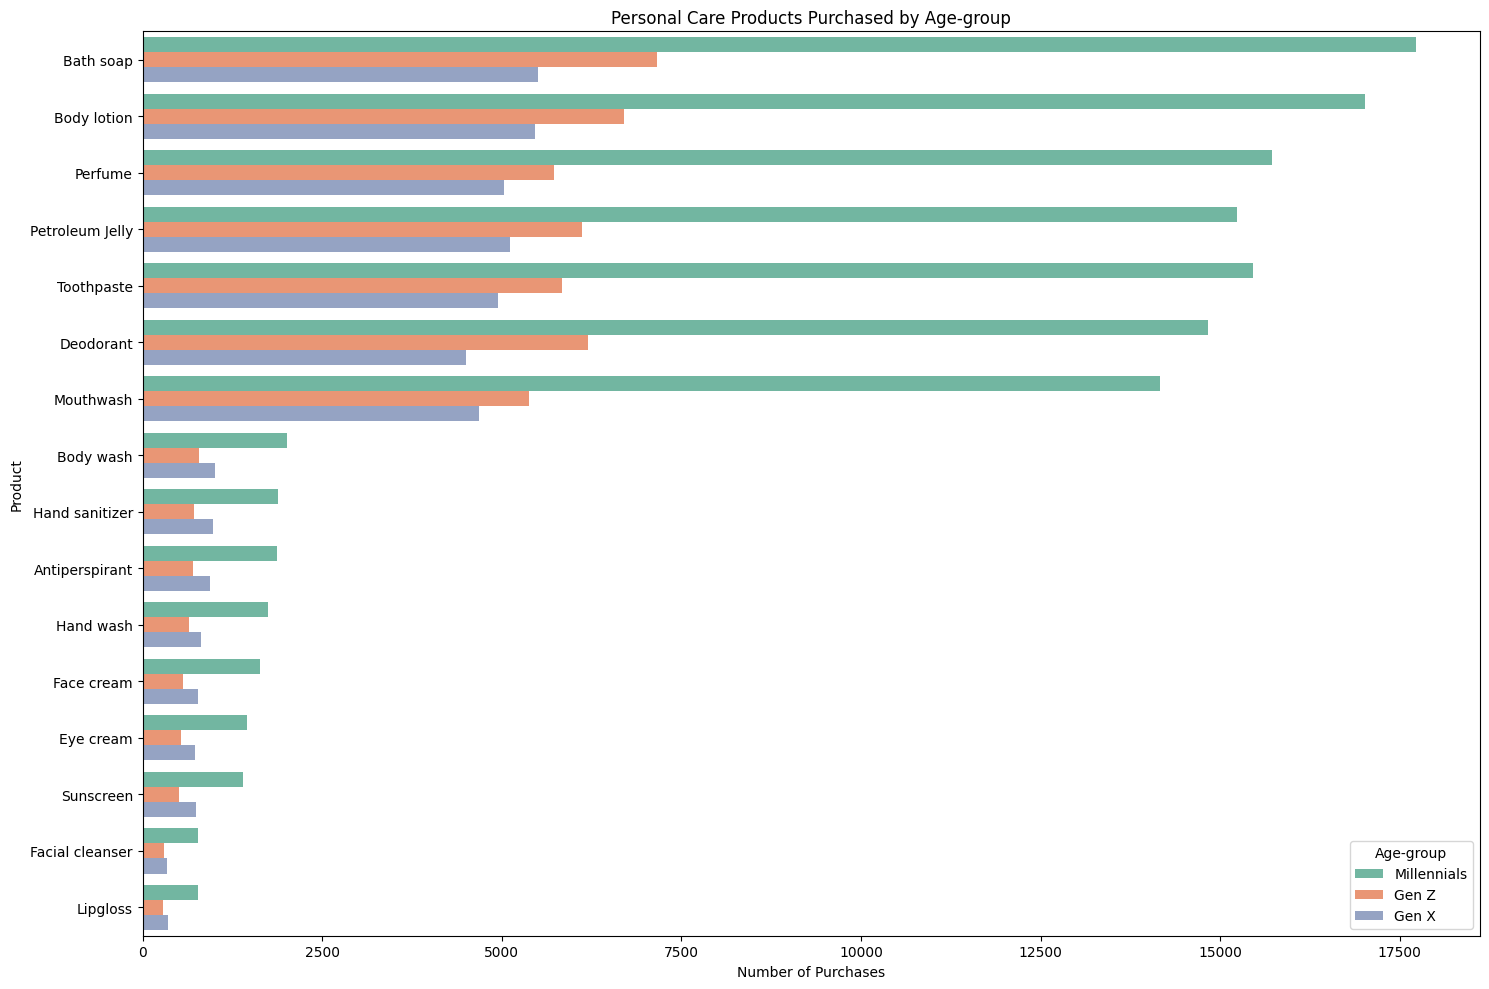

In [ ]:
# First, melt the dataframe to long format for easier plotting with seaborn
melted_data = data.melt(id_vars='Age-group', value_vars=personal_care_products, var_name='Product', value_name='Purchased')
# Filter only 'True' purchased products
melted_data = melted_data[melted_data['Purchased'] == True]
# Calculate the order: Count purchases per product, sort by count, get product names
order = melted_data['Product'].value_counts().index

plt.figure(figsize=(15, 10))
sns.countplot(data=melted_data, y='Product', hue='Age-group', palette='Set2',order=order)
plt.title('Personal Care Products Purchased by Age-group')
plt.xlabel('Number of Purchases')
plt.ylabel('Product')
plt.legend(title='Age-group')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


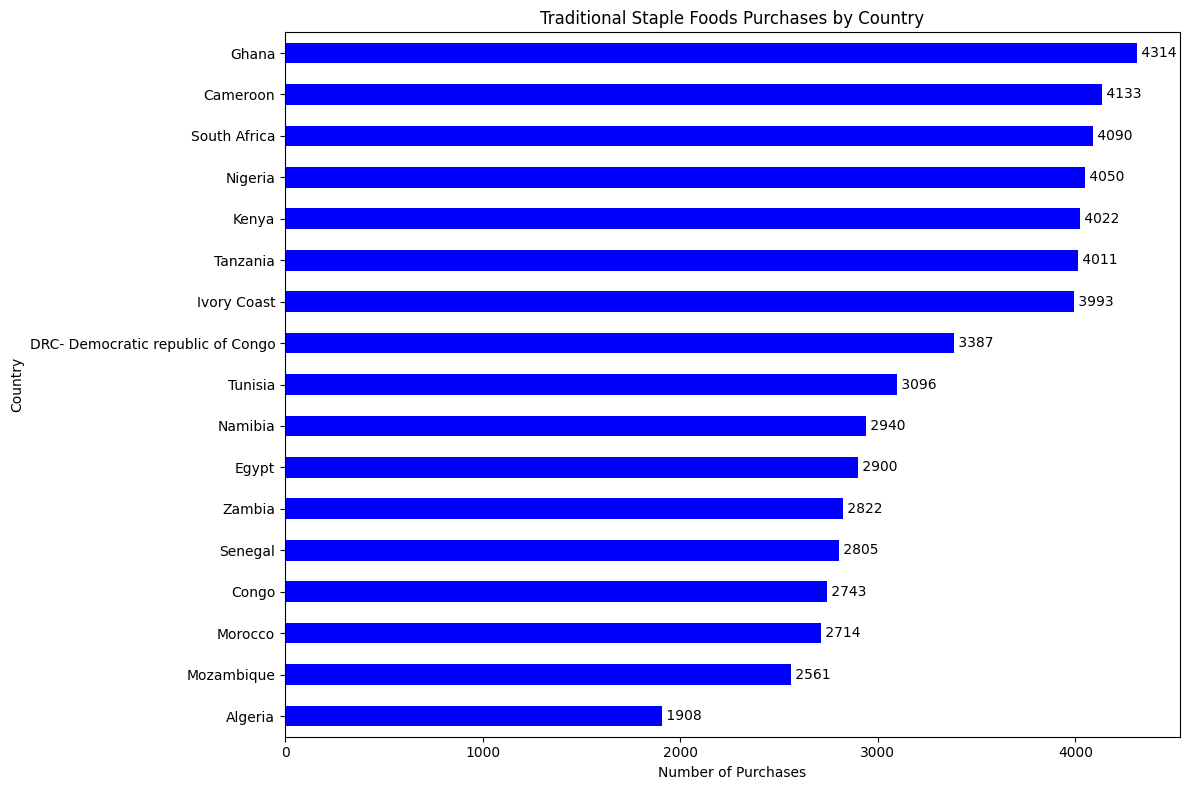

In [ ]:
country_product_purchases = data.groupby('Country')['Traditional staple foods'].sum()

# Sort values for better visualization
sorted_country_product_purchases = country_product_purchases.sort_values()

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 8))
sorted_country_product_purchases.plot(kind='barh', ax=ax, color='blue')
plt.title('Traditional Staple Foods Purchases by Country')
plt.xlabel('Number of Purchases')
plt.ylabel('Country')

# Annotate each bar with the number of purchases
for i, value in enumerate(sorted_country_product_purchases):
    ax.text(value, i, f' {value}', va='center')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-306a087b0245>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age-group', y='Total Fitness Drinks Purchased', data=data, estimator=sum, ci=None)


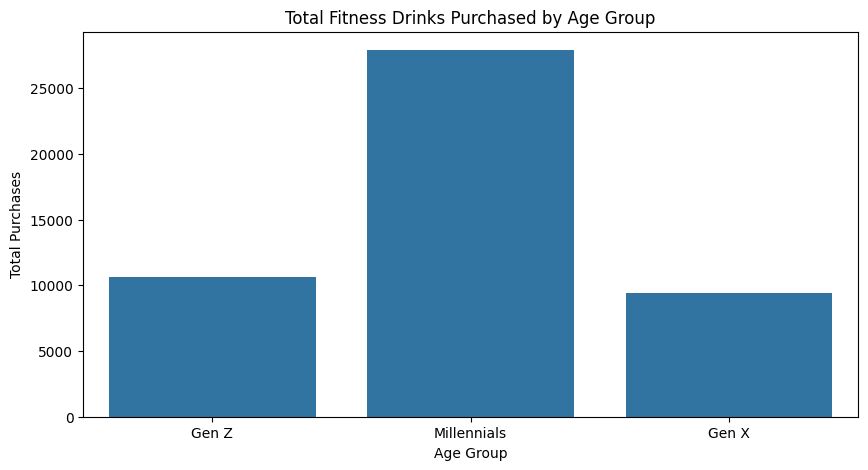

In [ ]:
#Purchase of fitness-related drinks by age group (e.g., Sports drinks, Energy drinks)

data['Total Fitness Drinks Purchased'] = data[['Sports drinks', 'Energy drinks']].sum(axis=1)
plt.figure(figsize=(10, 5))
sns.barplot(x='Age-group', y='Total Fitness Drinks Purchased', data=data, estimator=sum, ci=None)
plt.title('Total Fitness Drinks Purchased by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchases')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


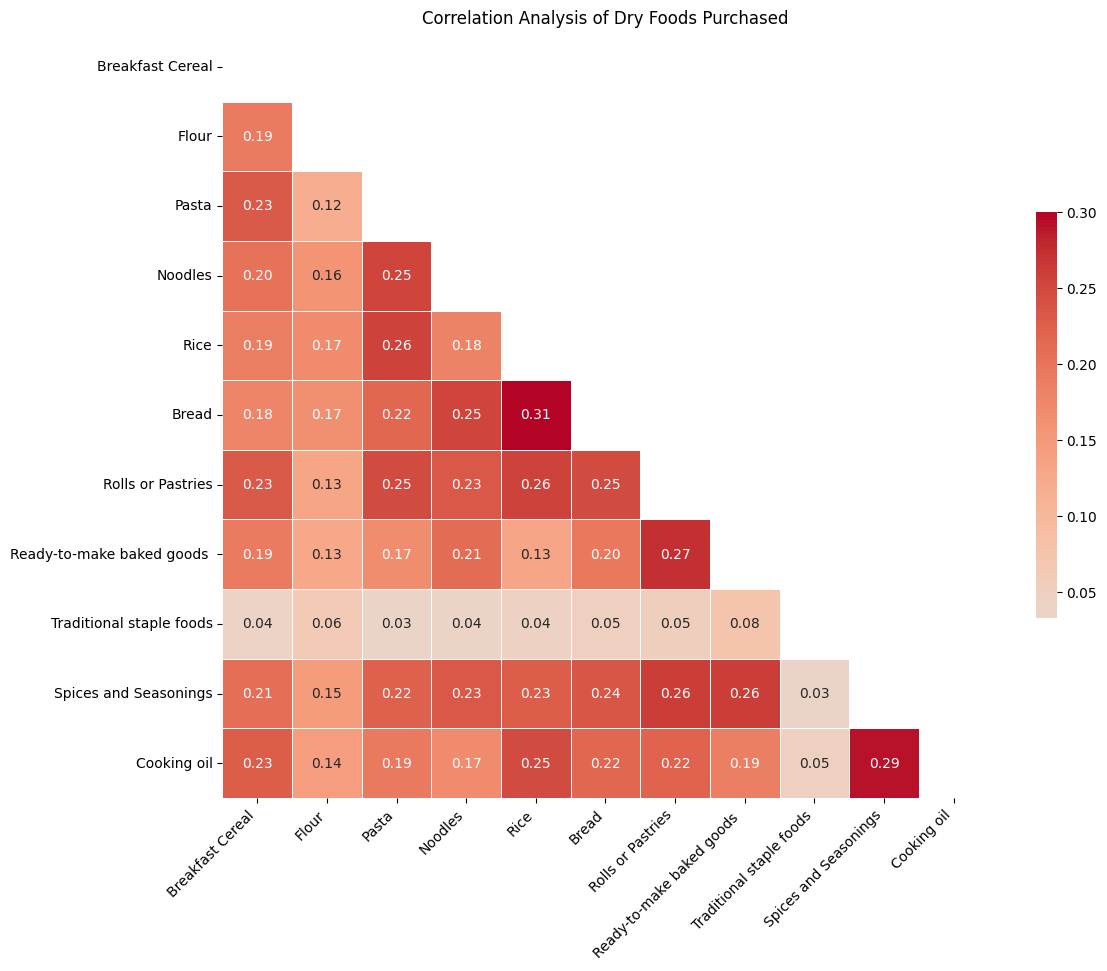

In [ ]:

# Compute the correlation matrix
corr_matrix = data[dry_foods].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Analysis of Dry Foods Purchased')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The heatmap visualizes the correlation coefficients between purchases of various dry food items. Positive values indicate a tendency for items to be bought together, while negative values suggest an inverse relationship. The most notable positive correlation is between 'Bread' and 'Rice' at 0.31, implying these items are frequently bought in conjunction. Most items show very weak to no significant correlation with each other, as evidenced by values close to zero; for example, 'Traditional staple foods' generally have low correlation values with other items, like 0.04 with Noodles and Rice, indicating no strong relationship in purchasing patterns.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


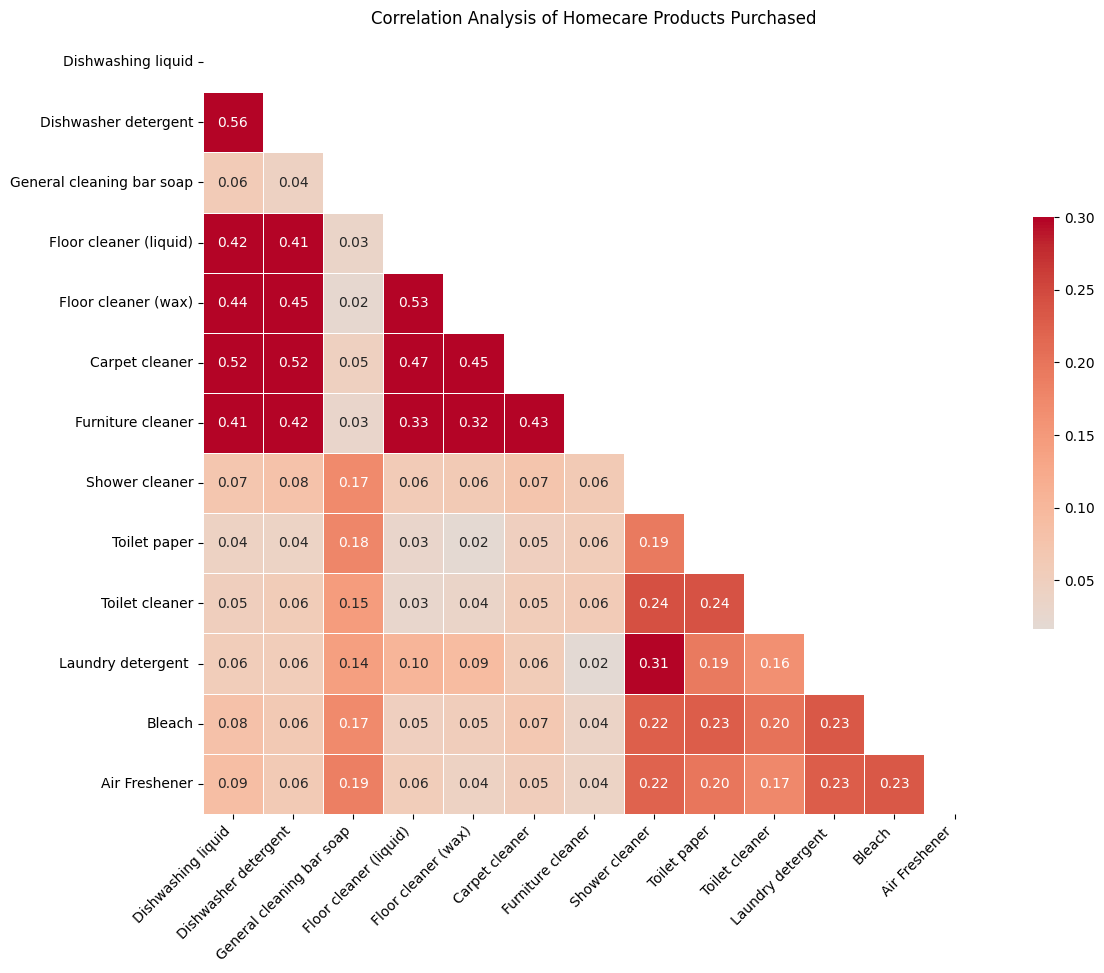

In [ ]:
# Compute the correlation matrix
corr_matrix = data [home_care_products].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Analysis of Homecare Products Purchased')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


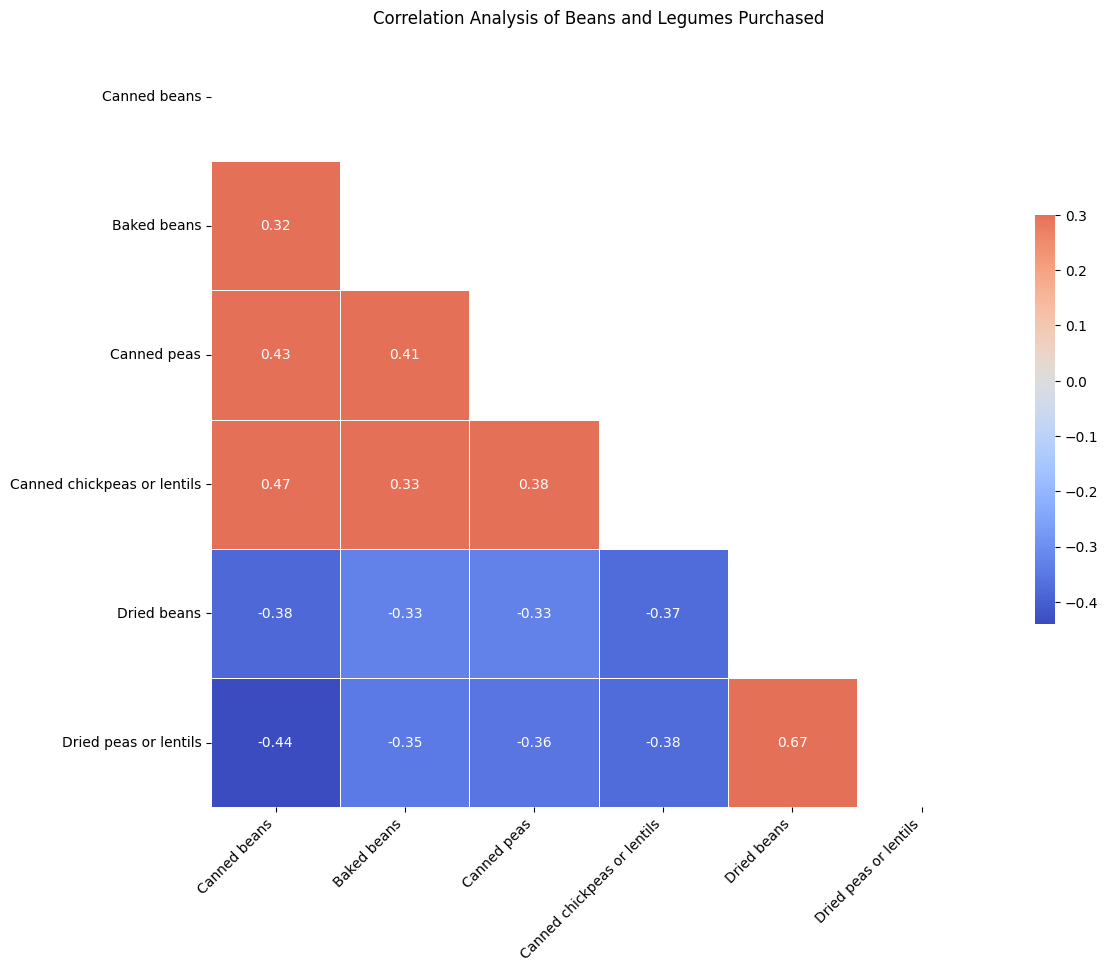

In [ ]:
# Compute the correlation matrix
corr_matrix = data[beans_legumes].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Analysis of Beans and Legumes Purchased')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


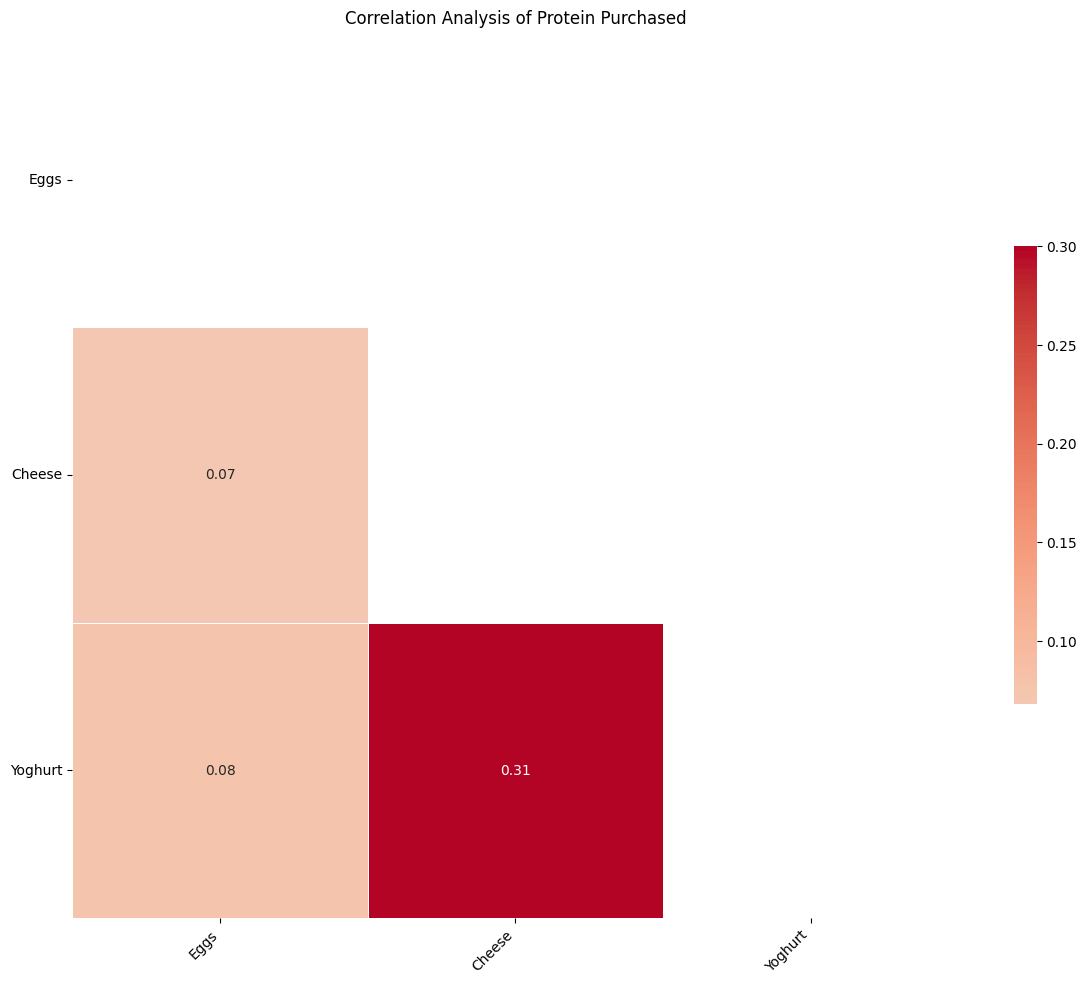

In [ ]:
# Compute the correlation matrix
corr_matrix = data[protein].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Analysis of Protein Purchased')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


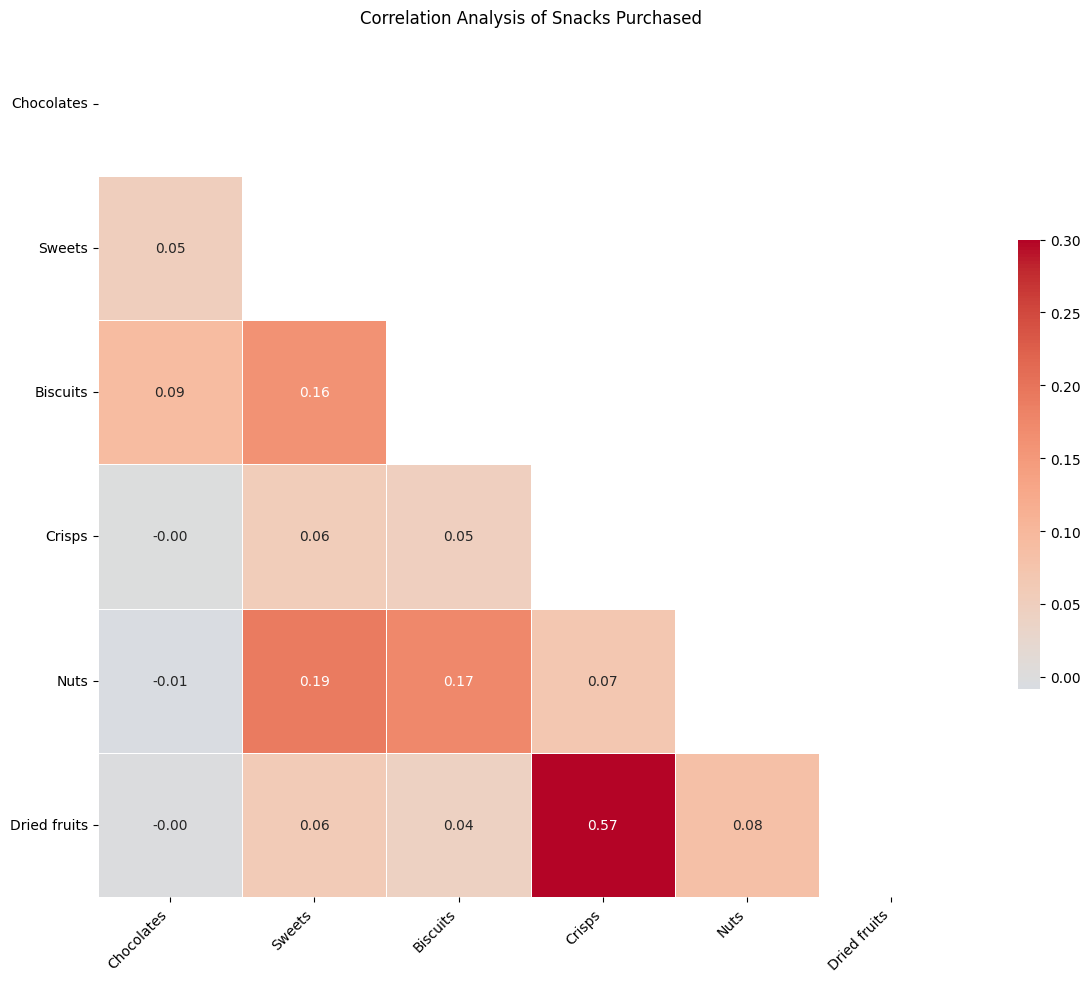

In [ ]:
# Compute the correlation matrix
corr_matrix = data[snacks].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Analysis of Snacks Purchased')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


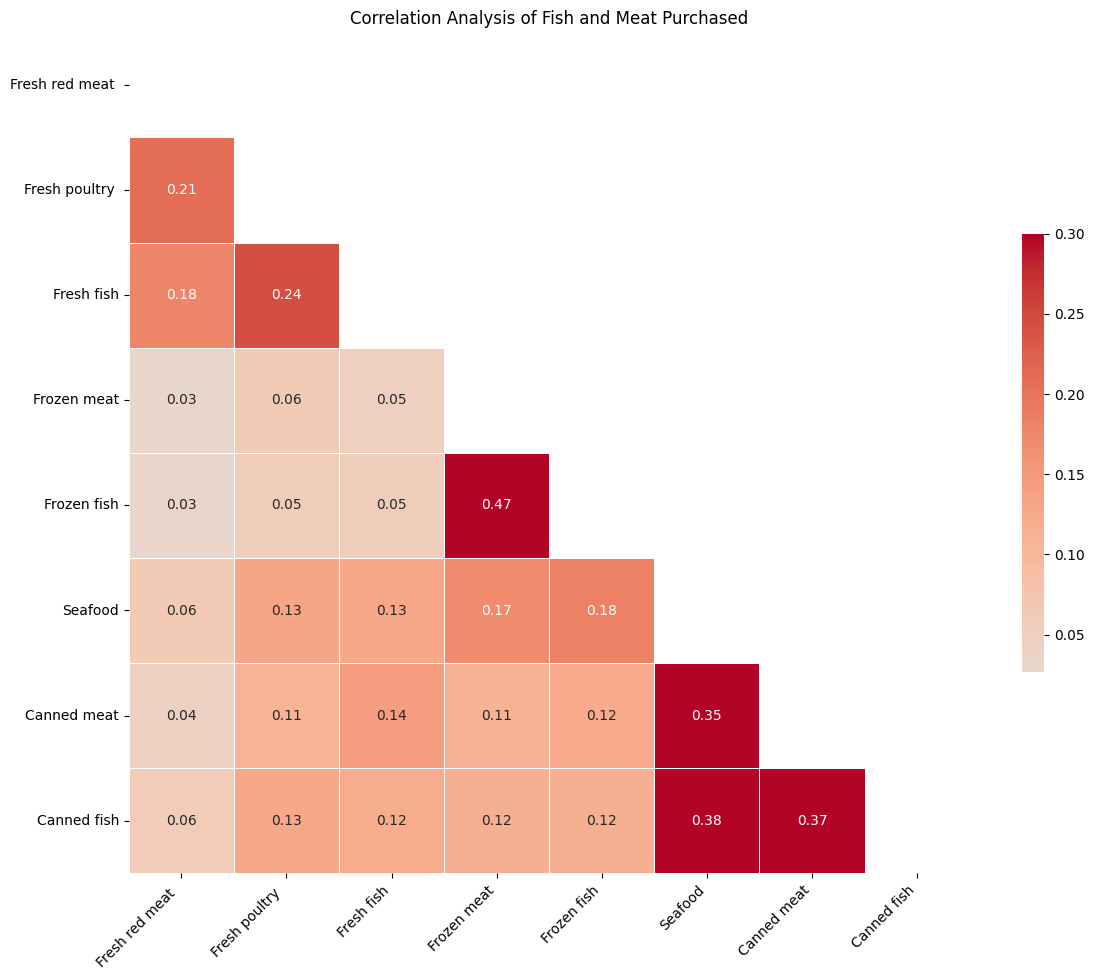

In [ ]:
# Compute the correlation matrix
corr_matrix = data[fish_meat].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Analysis of Fish and Meat Purchased')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


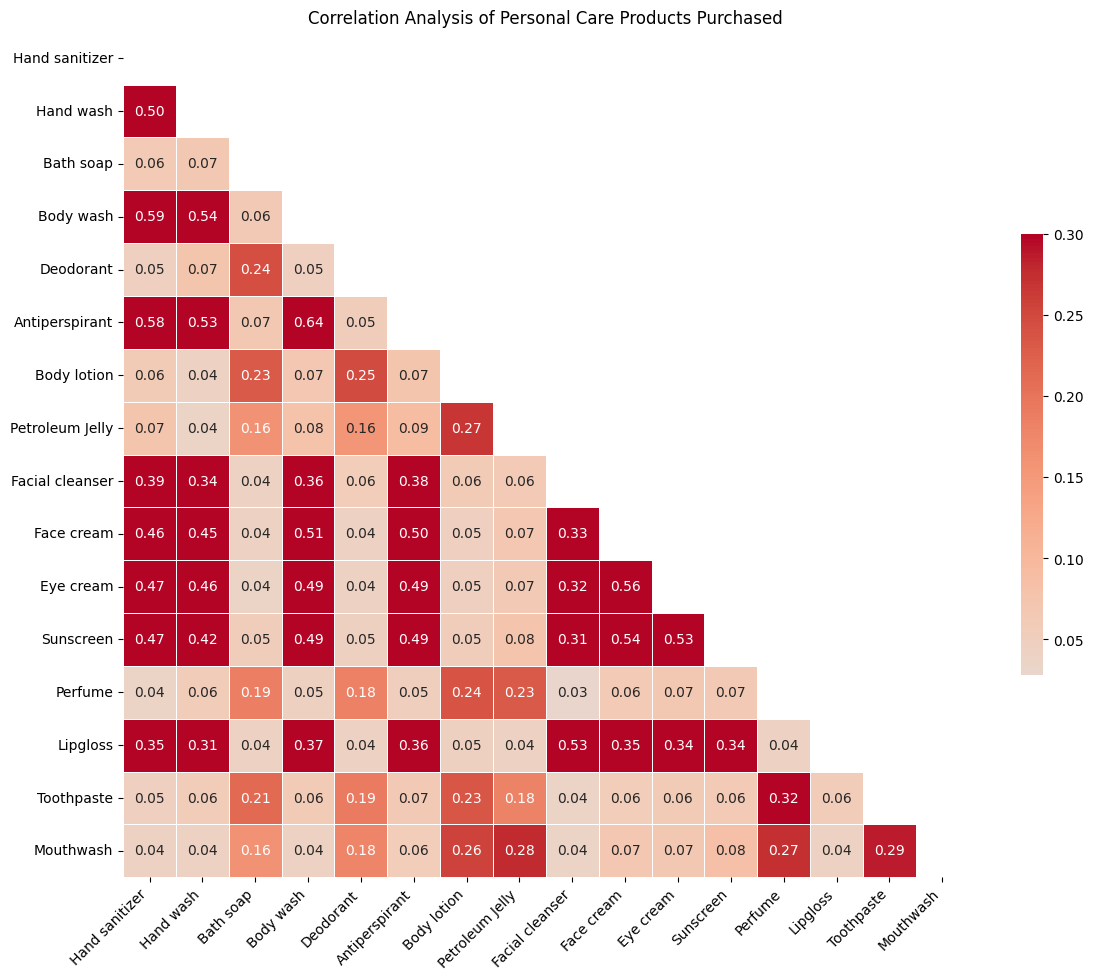

In [ ]:
# Compute the correlation matrix
corr_matrix = data[personal_care_products].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Analysis of Personal Care Products Purchased')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


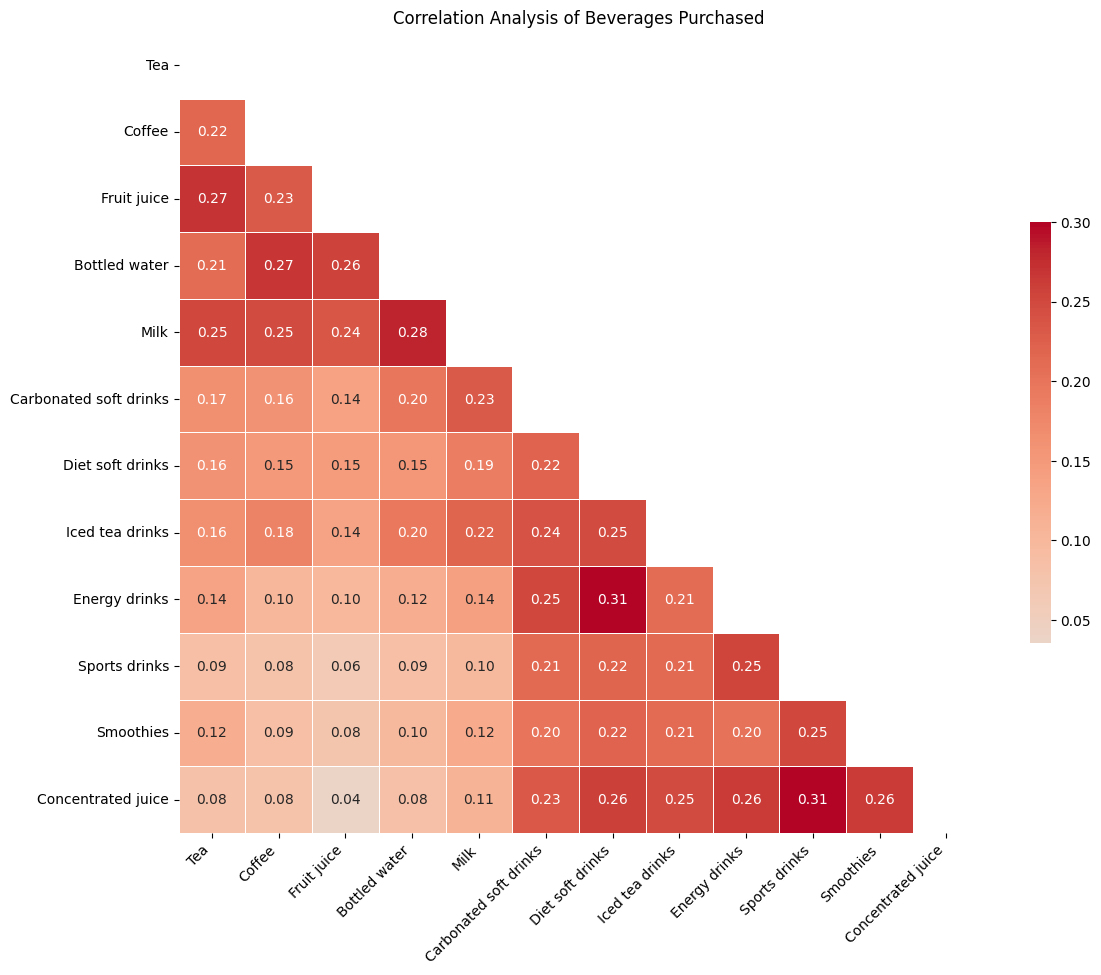

In [ ]:
# Compute the correlation matrix
corr_matrix = data[beverages].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Analysis of Beverages Purchased')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


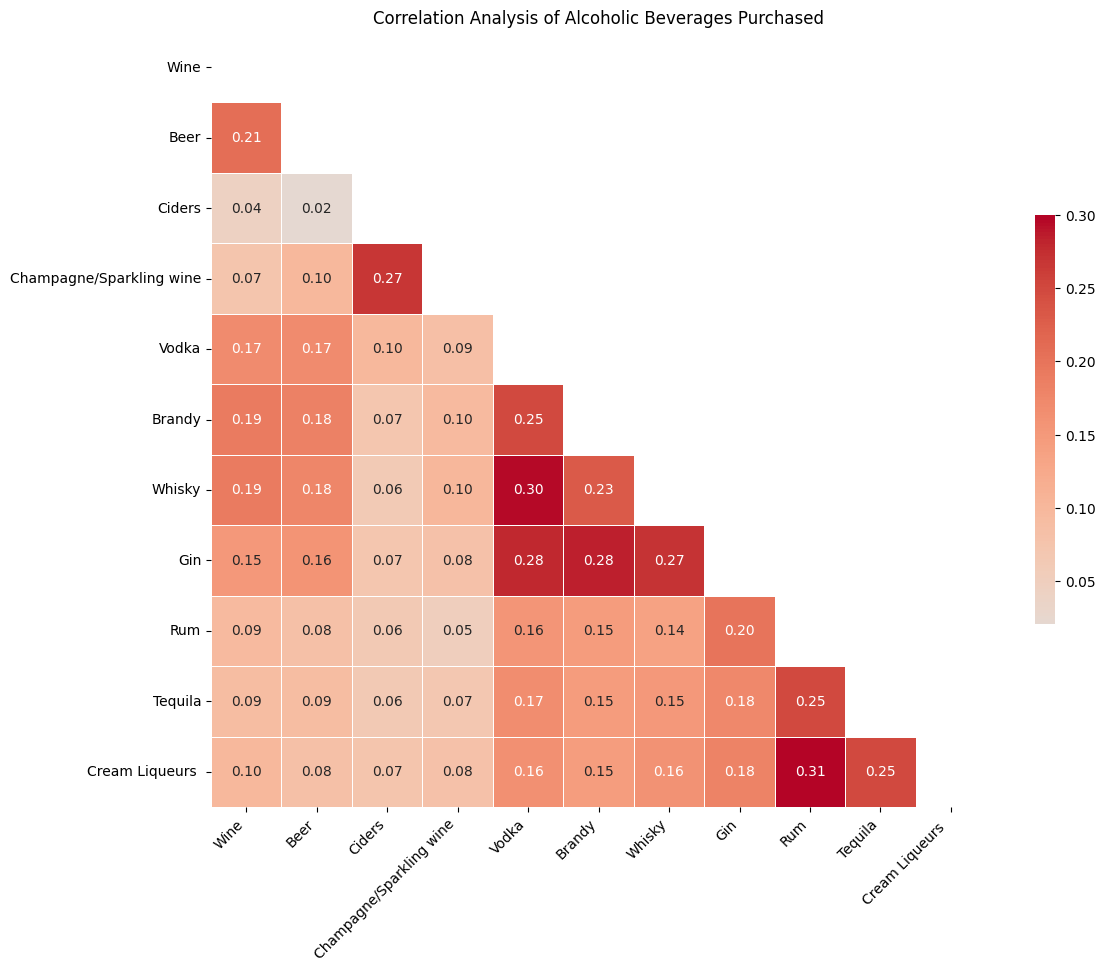

In [ ]:
# Compute the correlation matrix
corr_matrix = data[alcoholic_beverages].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Analysis of Alcoholic Beverages Purchased')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Period        Code  Gender Marital status    Age-group  \
0  Jun-23    K10R38b8    Male        Married        Gen Z   
1  Jun-23    D39R38a7  Female         Dating        Gen Z   
2  Jun-23    Z5R38b15  Female        Married        Gen Z   
3  Jun-23     K9R38b4  Female         Dating        Gen Z   
4  Jun-23    K9R38b11  Female         Single        Gen Z   
5  Jun-23   AB24R38b5    Male         Single        Gen Z   
6  Jun-23  AC30R38a14    Male        Married  Millennials   
7  Jun-23  AC30R38a29  Female        Married        Gen Z   
8  Jun-23   L16R38b11    Male         Single  Millennials   
9  Jun-23   T10R38b13    Male         Dating        Gen Z   

       Education level         Occupation Household with children under 18  \
0    University degree  Salaried employee                              Yes   
1  Vocational training  Salaried employee                               No   
2    University degree  Salaried employee                              Yes   
3    University degree  Salaried employee                              Yes   
4    University degree  Salaried employee                              Yes   
5          High school            Student                               No   
6    University degree  Salaried employee                              Yes   
7    University degree  Salaried employee                              Yes   
8    University degree     Business owner                              Yes   
9              Diploma  Salaried employee                              Yes   

   Household size                            Country  ... Ciders  \
0   3 or 4 people  DRC- Democratic republic of Congo  ...  False   
1   3 or 4 people                           Cameroon  ...  False   
2   5 or 6 people                             Zambia  ...  False   
3   5 or 6 people  DRC- Democratic republic of Congo  ...  False   
4   3 or 4 people  DRC- Democratic republic of Congo  ...  False   
5  Up to 2 people                        Ivory Coast  ...  False   
6  Up to 2 people                              Ghana  ...  False   
7  Up to 2 people                              Ghana  ...  False   
8   3 or 4 people                            Nigeria  ...  False   
9  Up to 2 people                           Tanzania  ...   True   

   Champagne/Sparkling wine  Vodka  Brandy  Whisky    Gin    Rum  Tequila  \
0                     False  False   False   False  False  False    False   
1                     False  False   False   False  False  False    False   
2                     False   True    True   False  False  False    False   
3                      True  False   False   False  False  False    False   
4                      True  False   False   False  False  False    False   
5                      True  False   False   False  False  False    False   
6                     False  False   False   False  False  False    False   
7                     False  False   False   False  False  False    False   
8                     False  False   False   False  False  False    False   
9                     False   True   False   False   True   True    False   

   Cream Liqueurs   Total Fitness Drinks Purchased  
0            False                               1  
1            False                               0  
2            False                               0  
3            False                               1  
4            False                               1  
5            False                               0  
6            False                               0  
7            False                               0  
8            False                               0  
9            False                               0  

[10 rows x 105 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:797: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


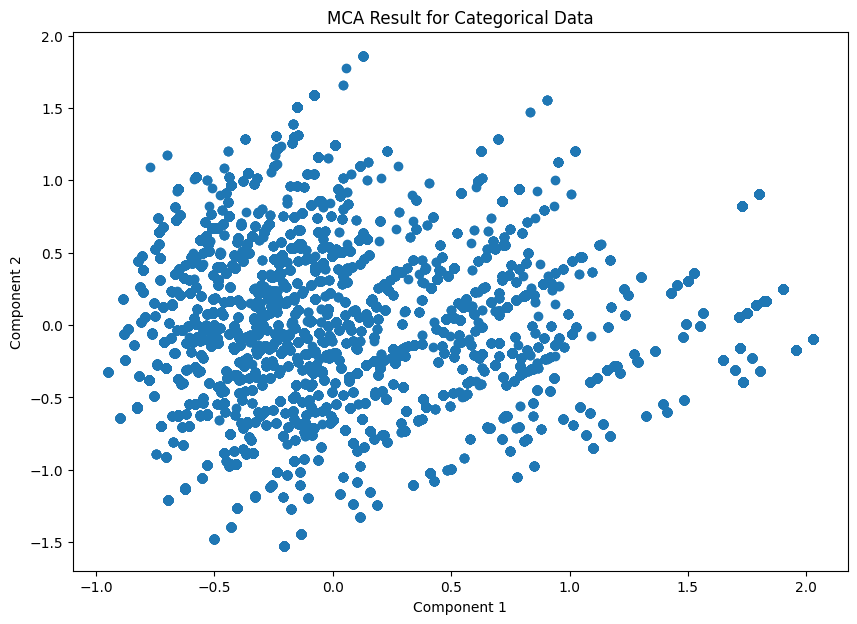

In [ ]:


# Selecting a subset of categorical columns for MCA
categorical_data = data[['Gender', 'Marital status', 'Country', 'Occupation']]

mca = MCA(n_components=2)
mca.fit(categorical_data)

# Transforming the data
mca_coordinates = mca.transform(categorical_data)

# Plotting the results
plt.figure(figsize=(10, 7))
plt.scatter(mca_coordinates[0], mca_coordinates[1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MCA Result for Categorical Data')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


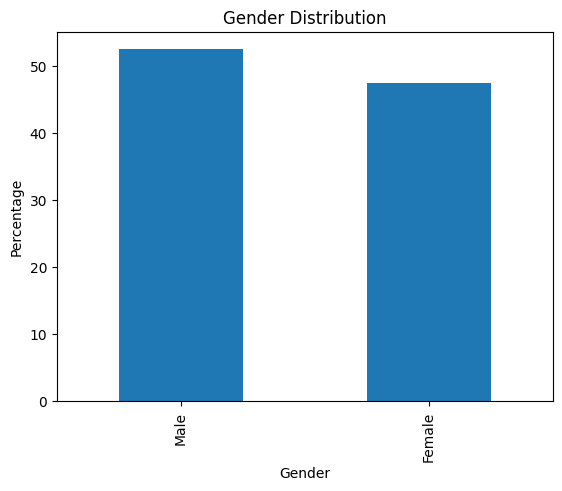

In [ ]:
# Calculating proportions for each category in 'Gender'
gender_proportions = data['Gender'].value_counts(normalize=True) * 100

# Plotting
gender_proportions.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

# Repeat this process for other demographic variables to analyze diversity

## Market Basket Analysis

### Apriori Algorithm



In [ ]:
# Defining product columns categorized into food, non-food, and drinks
food_columns = [
    'Breakfast Cereal', 'Flour', 'Pasta', 'Noodles', 'Rice', 'Bread', 'Rolls or Pastries',
    'Ready-to-make baked goods ', 'Traditional staple foods', 'Spices and Seasonings', 'Cooking oil',
    'Fresh fruits', 'Fresh vegetables', 'Canned fruit', 'Canned vegetables', 'Frozen fruit',
    'Frozen vegetables', 'Canned tomatoes', 'Canned beans', 'Baked beans', 'Canned peas',
    'Canned chickpeas or lentils', 'Dried beans', 'Dried peas or lentils', 'Fresh red meat ',
    'Fresh poultry ', 'Fresh fish', 'Frozen meat', 'Frozen fish', 'Seafood', 'Canned meat',
    'Canned fish', 'Eggs', 'Cheese', 'Yoghurt'
]

non_food_columns = [
    'Dishwashing liquid', 'Dishwasher detergent', 'General cleaning bar soap', 'Floor cleaner (liquid)',
    'Floor cleaner (wax)', 'Carpet cleaner', 'Furniture cleaner', 'Shower cleaner', 'Toilet paper',
    'Toilet cleaner', 'Laundry detergent ', 'Bleach', 'Air Freshener', 'Hand sanitizer', 'Hand wash',
    'Bath soap', 'Body wash', 'Deodorant', 'Antiperspirant', 'Body lotion', 'Petroleum Jelly',
    'Facial cleanser', 'Face cream', 'Eye cream', 'Sunscreen', 'Perfume', 'Lipgloss', 'Toothpaste',
    'Mouthwash'
]

drink_columns = [
    'Tea', 'Coffee', 'Fruit juice', 'Bottled water', 'Milk',
    'Carbonated soft drinks', 'Diet soft drinks', 'Iced tea drinks', 'Energy drinks', 'Sports drinks',
    'Smoothies', 'Concentrated juice', 'Wine', 'Beer', 'Ciders', 'Champagne/Sparkling wine', 'Vodka',
    'Brandy', 'Whisky', 'Gin', 'Rum', 'Tequila', 'Cream Liqueurs '
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Food Purchased

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
# Selecting only the product columns for food category
food_purchased = data[food_columns]

# Converting presence of item into binary (1) and absence into (0) for food category
food_purchase_data = food_purchased.applymap(lambda x: 1 if x else 0)

# Find frequent itemsets for food category
frequent_itemsets_food = apriori(food_purchase_data, min_support=0.5, use_colnames=True)

print(frequent_itemsets_food)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support                                           itemsets
0   0.642306                                            (Flour)
1   0.908534                         (Traditional staple foods)
2   0.927014                                      (Dried beans)
3   0.918763                            (Dried peas or lentils)
4   0.925582                                             (Eggs)
5   0.592109                  (Traditional staple foods, Flour)
6   0.602515                               (Dried beans, Flour)
7   0.597594                     (Dried peas or lentils, Flour)
8   0.600602                                      (Eggs, Flour)
9   0.891083            (Dried beans, Traditional staple foods)
10  0.888639  (Traditional staple foods, Dried peas or lentils)
11  0.886387                   (Traditional staple foods, Eggs)
12  0.899672               (Dried beans, Dried peas or lentils)
13  0.896487                                (Dried beans, Eggs)
14  0.894107                      (Eggs,

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Single Items:

Flour (64.23%), Traditional staple foods (90.85%), Dried beans (92.70%), Dried peas or lentils (91.88%), and Eggs (92.56%) have high individual support values, indicating they are very common in transactions. For example, Eggs appear in over 92% of transactions, making them one of the most commonly purchased items.
Two-Item Combinations:

Combos like Flour with Traditional staple foods (59.21%) and Dried beans with Flour (60.25%) show that these items are frequently bought together. The presence of staple foods like beans and flour in many transactions together suggests they are essential items for many customers.
Three-Item Combinations:

Sets like Flour, Dried beans, and Traditional staple foods (58.10%) indicate more specific shopping patterns. Customers buying flour are very likely to also buy dried beans and other traditional staples, possibly because these items are used together in recipes or meal planning.
Four-Item Combinations:

More complex patterns emerge with four items, such as Dried beans, Dried peas or lentils, Flour, and Eggs (57.78%). This combination suggests a strong correlation in the purchase of these items, perhaps due to their common use in household cooking and baking.
High Support for Staple Foods Together:

Combinations involving Traditional staple foods with Dried beans (89.11%), Dried peas or lentils (88.86%), and Eggs (88.64%) have very high support, indicating these staples are almost always bought together. This could reflect dietary habits or the popularity of these items in meals.
Interconnectedness of Staple Food Items:

The interconnectedness of staple items like beans, peas/lentils, and eggs, both in pairs and larger sets, highlights their centrality in shopping patterns. For instance, Dried peas or lentils, Dried beans, and Eggs (88.60%) being bought together suggests these are staple components of the diet among the dataset's demographic.
Significance of Flour:

Despite Flour's slightly lower individual support compared to other items, it frequently appears in combination with other staples, indicating its role in cooking and baking in households. Its combination with traditional staples and eggs suggests it's a key ingredient in many recipes.
Implications for Retailers:

Retailers might consider bundling these items together in promotions or placing them near each other in stores to encourage sales. Understanding these patterns can also help with inventory management, ensuring high-demand items are always in stock.

In summary, the data reveals strong purchasing patterns around staple food items, suggesting they are essential in most households. The frequent co-purchasing of items like flour, eggs, dried beans, and traditional staples indicates these items are often used together, likely in meal preparation.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


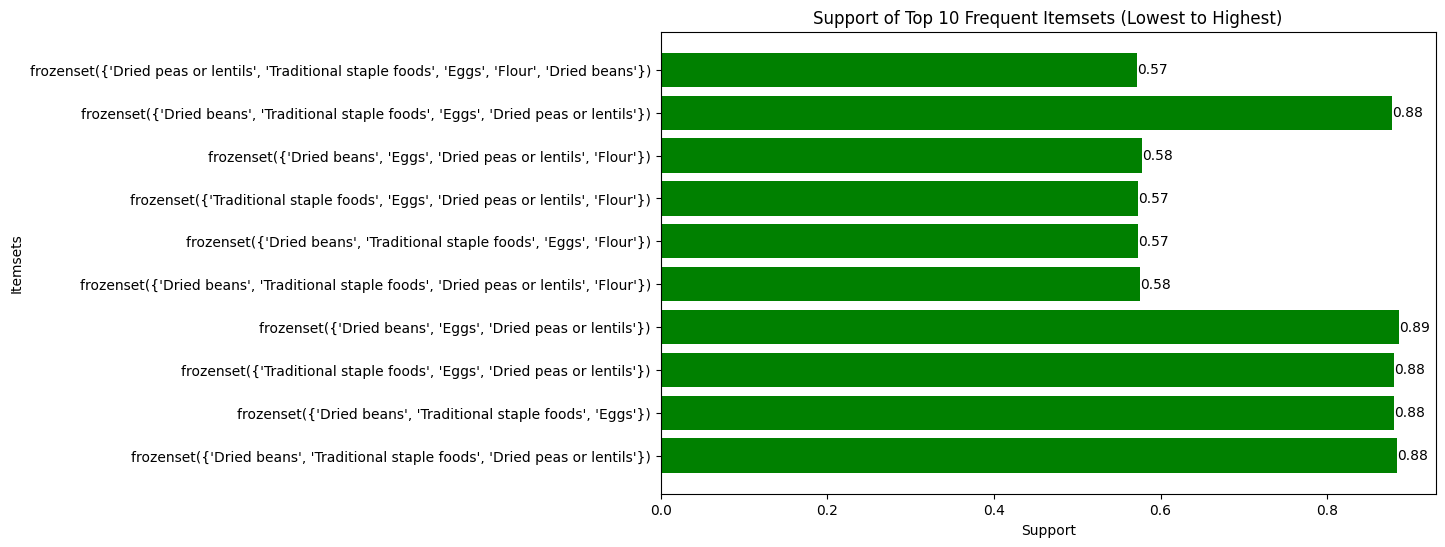

In [ ]:
# Select the top 10 itemsets
top_10_itemsets = frequent_itemsets_food.tail(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(top_10_itemsets)), top_10_itemsets['support'], color='green')
plt.yticks(range(len(top_10_itemsets)), top_10_itemsets['itemsets'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Support of Top 10 Frequent Itemsets (Lowest to Highest)')

# Annotate the support on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}',
             va='center', ha='left')

plt.show()


In [ ]:
# Generate association rules for food category
rules_food = association_rules(frequent_itemsets_food, metric="confidence", min_threshold=0.4)

# Sort and explore the rules for food category
rules_food_sorted = rules_food.sort_values(by='lift', ascending=False)
print(rules_food_sorted.to_string())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                               antecedents                                                            consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
144                      (Traditional staple foods, Dried peas or lentils)                                                    (Dried beans, Eggs)            0.888639            0.896487  0.878217    0.988272  1.102382  0.081563    8.826047       0.833986
141                                                    (Dried beans, Eggs)                      (Traditional staple foods, Dried peas or lentils)            0.896487            0.888639  0.878217    0.979620  1.102382  0.081563    5.464154       0.897222
168                                   (Dried beans, Dried peas or lentils)                                (Traditional staple foods, Eggs, Flour)            0.899672            0.576476  0.571700    0.635454  1.102306  0.053060    1.16

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


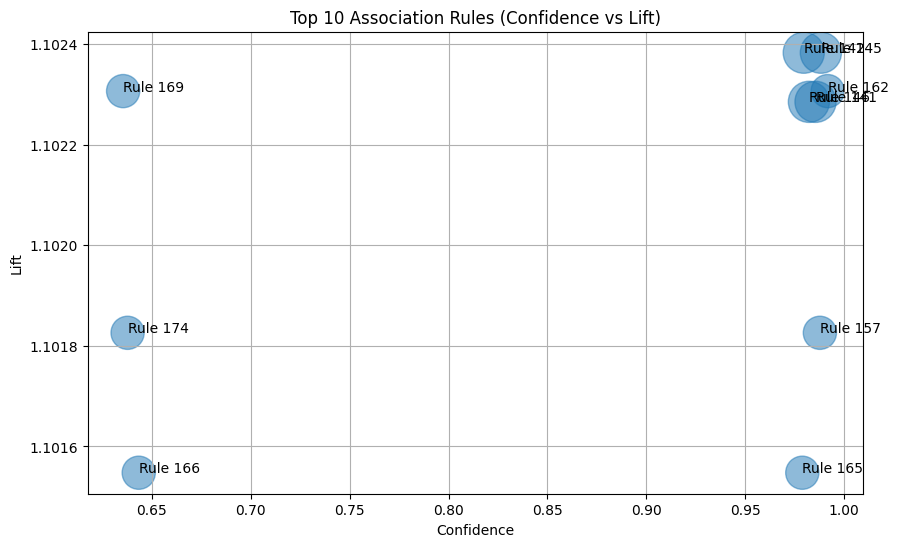

In [ ]:
# Select the top 10 rules
top_10_rules = rules_food_sorted.head(10)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_10_rules['confidence'], top_10_rules['lift'], s=top_10_rules['support']*1000, alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Top 10 Association Rules (Confidence vs Lift)')
plt.grid(True)

# Annotate the points
for i, row in top_10_rules.iterrows():
    plt.annotate(f"Rule {i+1}", (row['confidence'], row['lift']))

plt.show()

In [ ]:
# Refining the selection of food rules based on higher confidence, lift, and additional metrics

# 1. Filter by higher confidence (e.g., >= 0.96 and lift (e.g., >= 1.0)
refined_food_rules = rules_food[(rules_food ['confidence'] >= 0.96) & (rules_food['lift'] >= 1.08)]

# 2. Optional: Further refine by leverage and conviction, if you seek rules with stronger associations and predictive power
# This is just an example. Adjust thresholds based on your dataset characteristics and analysis goals.
refined_food_rules = refined_food_rules[(refined_food_rules['leverage'] > 0.05) & (refined_food_rules['conviction'] > 1.2)]

# Sorting the refined rules by lift (or another metric of your choice) to prioritize the most significant associations
refined_food_rules_sorted = refined_food_rules.sort_values(by='lift', ascending=False)

# Display the top refined and sorted food rules
print(refined_food_rules_sorted.to_string())

                                                  antecedents                                        consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
144         (Traditional staple foods, Dried peas or lentils)                                (Dried beans, Eggs)            0.888639            0.896487  0.878217    0.988272  1.102382  0.081563    8.826047       0.833986
141                                       (Dried beans, Eggs)  (Traditional staple foods, Dried peas or lentils)            0.896487            0.888639  0.878217    0.979620  1.102382  0.081563    5.464154       0.897222
161                   (Traditional staple foods, Eggs, Flour)               (Dried beans, Dried peas or lentils)            0.576476            0.899672  0.571700    0.991714  1.102306  0.053060   12.107947       0.219140
140                   (Dried beans, Traditional staple foods)                      (Eggs, Dried peas or lentils)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Non-food items Purchased

In [ ]:
# Select only the product columns for non-food category
non_food_purchased = data[non_food_columns]

# Convert presence of item into binary (1) and absence into (0) for non-food category
non_food_purchase_data = non_food_purchased.applymap(lambda x: 1 if x else 0)

# Find frequent itemsets for non-food category
frequent_itemsets_non_food = apriori(non_food_purchase_data, min_support=0.25, use_colnames=True)
print(frequent_itemsets_non_food)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support                                    itemsets
0   0.471179                 (General cleaning bar soap)
1   0.388976                            (Shower cleaner)
2   0.427995                              (Toilet paper)
3   0.400396                            (Toilet cleaner)
4   0.307691                        (Laundry detergent )
5   0.421561                                    (Bleach)
6   0.440588                             (Air Freshener)
7   0.488726                                 (Bath soap)
8   0.410657                                 (Deodorant)
9   0.469265                               (Body lotion)
10  0.425823                           (Petroleum Jelly)
11  0.425936                                   (Perfume)
12  0.422044                                (Toothpaste)
13  0.389652                                 (Mouthwash)
14  0.253924  (Air Freshener, General cleaning bar soap)
15  0.283035      (Bath soap, General cleaning bar soap)
16  0.268448    (Body lotion, G

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Generate association rules for non-food category
rules_non_food = association_rules(frequent_itemsets_non_food, metric="confidence", min_threshold=0.3)

# Sort and explore the rules for non-food category
rules_non_food_sorted = rules_non_food.sort_values(by='lift', ascending=False)
print("Non-Food Rules:")
print(rules_non_food_sorted.to_string())

Non-Food Rules:
                    antecedents                  consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
35                 (Toothpaste)                    (Perfume)            0.422044            0.425936  0.258942    0.613544  1.440460  0.079179    1.485456       0.529066
34                    (Perfume)                 (Toothpaste)            0.425936            0.422044  0.258942    0.607937  1.440460  0.079179    1.474142       0.532653
16              (Air Freshener)            (Petroleum Jelly)            0.440588            0.425823  0.258396    0.586479  1.377282  0.070783    1.388506       0.489678
17            (Petroleum Jelly)              (Air Freshener)            0.425823            0.440588  0.258396    0.606814  1.377282  0.070783    1.422766       0.477087
29            (Petroleum Jelly)                (Body lotion)            0.425823            0.469265  0.265826    0.624263  1.330301  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Drinks Purchased

In [ ]:
# Select only the product columns for drinks category
drink_purchased = data[drink_columns]

# Convert presence of item into binary (1) and absence into (0) for drinks category
drink_purchase_data = drink_purchased.applymap(lambda x: 1 if x else 0)

# Find frequent itemsets for drinks category
frequent_itemsets_drink = apriori(drink_purchase_data, min_support=0.25, use_colnames=True)

print(frequent_itemsets_drink)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support                      itemsets
0   0.451155                         (Tea)
1   0.418039                      (Coffee)
2   0.458457                 (Fruit juice)
3   0.432643               (Bottled water)
4   0.434557                        (Milk)
5   0.379841      (Carbonated soft drinks)
6   0.366460            (Diet soft drinks)
7   0.345680             (Iced tea drinks)
8   0.408984               (Energy drinks)
9   0.362471               (Sports drinks)
10  0.340758                   (Smoothies)
11  0.326460          (Concentrated juice)
12  0.415820                        (Wine)
13  0.418361                        (Beer)
14  0.319786                       (Vodka)
15  0.330658                      (Brandy)
16  0.314317                      (Whisky)
17  0.281234                         (Gin)
18  0.273578            (Tea, Fruit juice)
19  0.257929                   (Tea, Milk)
20  0.261805  (Fruit juice, Bottled water)
21  0.257704           (Fruit juice, Milk)
22  0.25706

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Generate association rules for drinks category
rules_drink = association_rules(frequent_itemsets_drink, metric="confidence", min_threshold=0.3)

# Sort and explore the rules for drinks category
rules_drink_sorted = rules_drink.sort_values(by='lift', ascending=False)
print("Drink Rules:")
print(rules_drink_sorted.to_string())

Drink Rules:
       antecedents      consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
9           (Milk)  (Bottled water)            0.434557            0.432643  0.257061    0.591547  1.367287  0.069053    1.389038       0.475069
8  (Bottled water)           (Milk)            0.432643            0.434557  0.257061    0.594164  1.367287  0.069053    1.393279       0.473466
0            (Tea)    (Fruit juice)            0.451155            0.458457  0.273578    0.606395  1.322689  0.066743    1.375857       0.444505
1    (Fruit juice)            (Tea)            0.458457            0.451155  0.273578    0.596737  1.322689  0.066743    1.361012       0.450498
4    (Fruit juice)  (Bottled water)            0.458457            0.432643  0.261805    0.571058  1.319929  0.063457    1.322689       0.447579
5  (Bottled water)    (Fruit juice)            0.432643            0.458457  0.261805    0.605130  1.319929  0.063457

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### FP-Growth Algorithm





In [ ]:
# Selecting the food columns from the DataFrame
food_df = data[food_columns]

# Applying FP-Growth to find frequent itemsets in the food category
frequent_itemsets_food = fpgrowth(food_df, min_support=0.5, use_colnames=True)

print(frequent_itemsets_food)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support                                           itemsets
0   0.927014                                      (Dried beans)
1   0.925582                                             (Eggs)
2   0.918763                            (Dried peas or lentils)
3   0.908534                         (Traditional staple foods)
4   0.642306                                            (Flour)
5   0.896487                                (Dried beans, Eggs)
6   0.899672               (Dried beans, Dried peas or lentils)
7   0.894107                      (Eggs, Dried peas or lentils)
8   0.885953         (Dried beans, Eggs, Dried peas or lentils)
9   0.891083            (Dried beans, Traditional staple foods)
10  0.888639  (Traditional staple foods, Dried peas or lentils)
11  0.886387                   (Traditional staple foods, Eggs)
12  0.883508  (Dried beans, Traditional staple foods, Dried ...
13  0.880324      (Dried beans, Traditional staple foods, Eggs)
14  0.880098  (Traditional staple foods,

In [ ]:
# Generating association rules from the frequent itemsets for the food category
rules_food = association_rules(frequent_itemsets_food, metric="confidence", min_threshold=0.7)

# Display the food category association rules
print("Food Category Association Rules")
print(rules_food)

Food Category Association Rules
                           antecedents  \
0                        (Dried beans)   
1                               (Eggs)   
2                        (Dried beans)   
3              (Dried peas or lentils)   
4                               (Eggs)   
..                                 ...   
110     (Flour, Dried peas or lentils)   
111  (Traditional staple foods, Flour)   
112                      (Eggs, Flour)   
113               (Dried beans, Flour)   
114                            (Flour)   

                                           consequents  antecedent support  \
0                                               (Eggs)            0.927014   
1                                        (Dried beans)            0.925582   
2                              (Dried peas or lentils)            0.927014   
3                                        (Dried beans)            0.918763   
4                              (Dried peas or lentils)            0.92558

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Selecting the non-food columns from the DataFrame
non_food_df = data[non_food_columns]

# Applying FP-Growth to find frequent itemsets in the non-food category
frequent_itemsets_non_food = fpgrowth(non_food_df, min_support=0.25, use_colnames=True)

print(frequent_itemsets_non_food)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support                                    itemsets
0   0.488726                                 (Bath soap)
1   0.471179                 (General cleaning bar soap)
2   0.427995                              (Toilet paper)
3   0.422044                                (Toothpaste)
4   0.469265                               (Body lotion)
5   0.425823                           (Petroleum Jelly)
6   0.388976                            (Shower cleaner)
7   0.440588                             (Air Freshener)
8   0.410657                                 (Deodorant)
9   0.400396                            (Toilet cleaner)
10  0.425936                                   (Perfume)
11  0.421561                                    (Bleach)
12  0.389652                                 (Mouthwash)
13  0.307691                        (Laundry detergent )
14  0.283035      (Bath soap, General cleaning bar soap)
15  0.260695                   (Toilet paper, Bath soap)
16  0.251094                 (B

In [ ]:
# Generating association rules from the frequent itemsets for the non-food category
rules_non_food = association_rules(frequent_itemsets_non_food, metric="confidence", min_threshold=0.1)

# Display the non-food category association rules
print("\nNon-Food Category Association Rules")
print(rules_non_food)


Non-Food Category Association Rules
                    antecedents                  consequents  \
0                   (Bath soap)  (General cleaning bar soap)   
1   (General cleaning bar soap)                  (Bath soap)   
2                (Toilet paper)                  (Bath soap)   
3                   (Bath soap)               (Toilet paper)   
4                 (Body lotion)               (Toilet paper)   
5                (Toilet paper)                (Body lotion)   
6                  (Toothpaste)                  (Bath soap)   
7                   (Bath soap)                 (Toothpaste)   
8                     (Perfume)                 (Toothpaste)   
9                  (Toothpaste)                    (Perfume)   
10                (Body lotion)                 (Toothpaste)   
11                 (Toothpaste)                (Body lotion)   
12                (Body lotion)                  (Bath soap)   
13                  (Bath soap)                (Body lotion)   
14 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Selecting the drinks columns from the DataFrame
drink_df = data[drink_columns]

# Applying FP-Growth to find frequent itemsets in the drinks category
frequent_itemsets_drink = fpgrowth(drink_df, min_support=0.25, use_colnames=True)

print(frequent_itemsets_drink)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support                      itemsets
0   0.458457                 (Fruit juice)
1   0.434557                        (Milk)
2   0.432643               (Bottled water)
3   0.418039                      (Coffee)
4   0.415820                        (Wine)
5   0.366460            (Diet soft drinks)
6   0.362471               (Sports drinks)
7   0.451155                         (Tea)
8   0.418361                        (Beer)
9   0.330658                      (Brandy)
10  0.319786                       (Vodka)
11  0.408984               (Energy drinks)
12  0.379841      (Carbonated soft drinks)
13  0.281234                         (Gin)
14  0.314317                      (Whisky)
15  0.345680             (Iced tea drinks)
16  0.340758                   (Smoothies)
17  0.326460          (Concentrated juice)
18  0.257704           (Fruit juice, Milk)
19  0.257929                   (Tea, Milk)
20  0.261805  (Fruit juice, Bottled water)
21  0.257061         (Bottled water, Milk)
22  0.27357

In [ ]:
# Generating association rules from the frequent itemsets for the drinks category
rules_drink = association_rules(frequent_itemsets_drink, metric="confidence", min_threshold=0.2)

# Display the drinks category association rules
print("\nDrinks Category Association Rules")
print(rules_drink)


Drinks Category Association Rules
       antecedents      consequents  antecedent support  consequent support  \
0    (Fruit juice)           (Milk)            0.458457            0.434557   
1           (Milk)    (Fruit juice)            0.434557            0.458457   
2            (Tea)           (Milk)            0.451155            0.434557   
3           (Milk)            (Tea)            0.434557            0.451155   
4    (Fruit juice)  (Bottled water)            0.458457            0.432643   
5  (Bottled water)    (Fruit juice)            0.432643            0.458457   
6  (Bottled water)           (Milk)            0.432643            0.434557   
7           (Milk)  (Bottled water)            0.434557            0.432643   
8            (Tea)    (Fruit juice)            0.451155            0.458457   
9    (Fruit juice)            (Tea)            0.458457            0.451155   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.257704    0.56211

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Comparative Analysis of the two algorithms

In [ ]:
#Comparison of the two association rule mining algorithms
import tracemalloc
import time
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def compare_and_visualize_mba_algorithms(df, min_support, min_confidence):
    # Start tracking memory usage
    tracemalloc.start()

    # Execute Apriori
    start_time = time.time()
    frequent_itemsets_apriori = apriori(df, min_support=min_support, use_colnames=True)
    rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=min_confidence)
    apriori_time = time.time() - start_time
    apriori_memory = tracemalloc.get_traced_memory()[1] # Get peak memory usage
    tracemalloc.stop() # Stop tracking memory usage

    # Restart tracking for FP-Growth
    tracemalloc.start()

    # Execute FP-Growth
    start_time = time.time()
    frequent_itemsets_fpgrowth = fpgrowth(df, min_support=min_support, use_colnames=True)
    rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=min_confidence)
    fpgrowth_time = time.time() - start_time
    fpgrowth_memory = tracemalloc.get_traced_memory()[1] # Get peak memory usage
    tracemalloc.stop() # Stop tracking memory usage

    # Metrics Calculation
    metrics = ['lift', 'support', 'conviction', 'leverage']
    apriori_metrics = rules_apriori[metrics].mean()
    fpgrowth_metrics = rules_fpgrowth[metrics].mean()

    # Results
    print(f"Apriori: {len(frequent_itemsets_apriori)} itemsets, {len(rules_apriori)} rules, Time: {apriori_time:.4f} seconds, Memory: {apriori_memory / 10**6:.4f} MB")
    print(f"FP-Growth: {len(frequent_itemsets_fpgrowth)} itemsets, {len(rules_fpgrowth)} rules, Time: {fpgrowth_time:.4f} seconds, Memory: {fpgrowth_memory / 10**6:.4f} MB")

    print("\nAverage Metrics:")
    print("Apriori\n", apriori_metrics)
    print("\nFP-Growth\n", fpgrowth_metrics)

    # Visualization
    fig, axs = plt.subplots(3, 2, figsize=(12, 12))
    fig.suptitle('Comparison of Average Metrics and Memory Usage: Apriori vs FP-Growth')

    # Plotting average metrics
    for i, metric in enumerate(metrics + ['memory', 'time']):
        if metric == 'memory':
            data = [apriori_memory / 10**6, fpgrowth_memory / 10**6]
        elif metric == 'time':
            data = [apriori_time, fpgrowth_time]
        else:
            data = [apriori_metrics[metric], fpgrowth_metrics[metric]]
        axs[i//2, i%2].bar(['Apriori', 'FP-Growth'], data)
        axs[i//2, i%2].set_title(metric.capitalize())

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori: 31 itemsets, 180 rules, Time: 0.0515 seconds, Memory: 16.6865 MB
FP-Growth: 31 itemsets, 180 rules, Time: 1.6346 seconds, Memory: 4.3540 MB

Average Metrics:
Apriori
 lift          1.064623
support       0.662500
conviction    3.935224
leverage      0.040481
dtype: float64

FP-Growth
 lift          1.064623
support       0.662500
conviction    3.935224
leverage      0.040481
dtype: float64


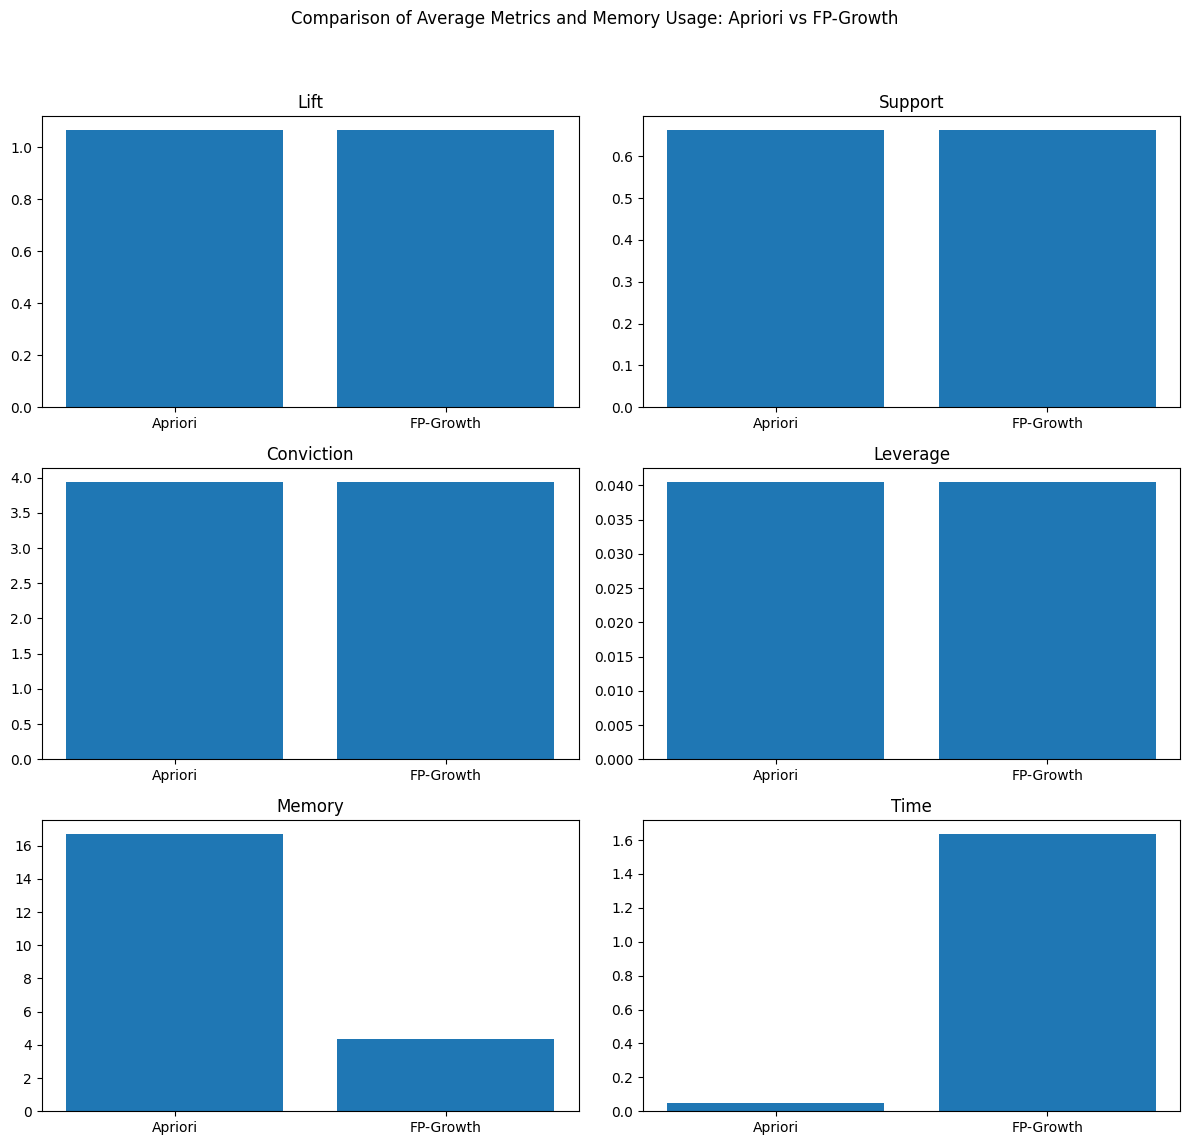

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori: 32 itemsets, 36 rules, Time: 0.1150 seconds, Memory: 96.7069 MB
FP-Growth: 32 itemsets, 36 rules, Time: 1.7963 seconds, Memory: 5.6895 MB

Average Metrics:
Apriori
 lift          1.281735
support       0.262256
conviction    1.306724
leverage      0.057189
dtype: float64

FP-Growth
 lift          1.281735
support       0.262256
conviction    1.306724
leverage      0.057189
dtype: float64


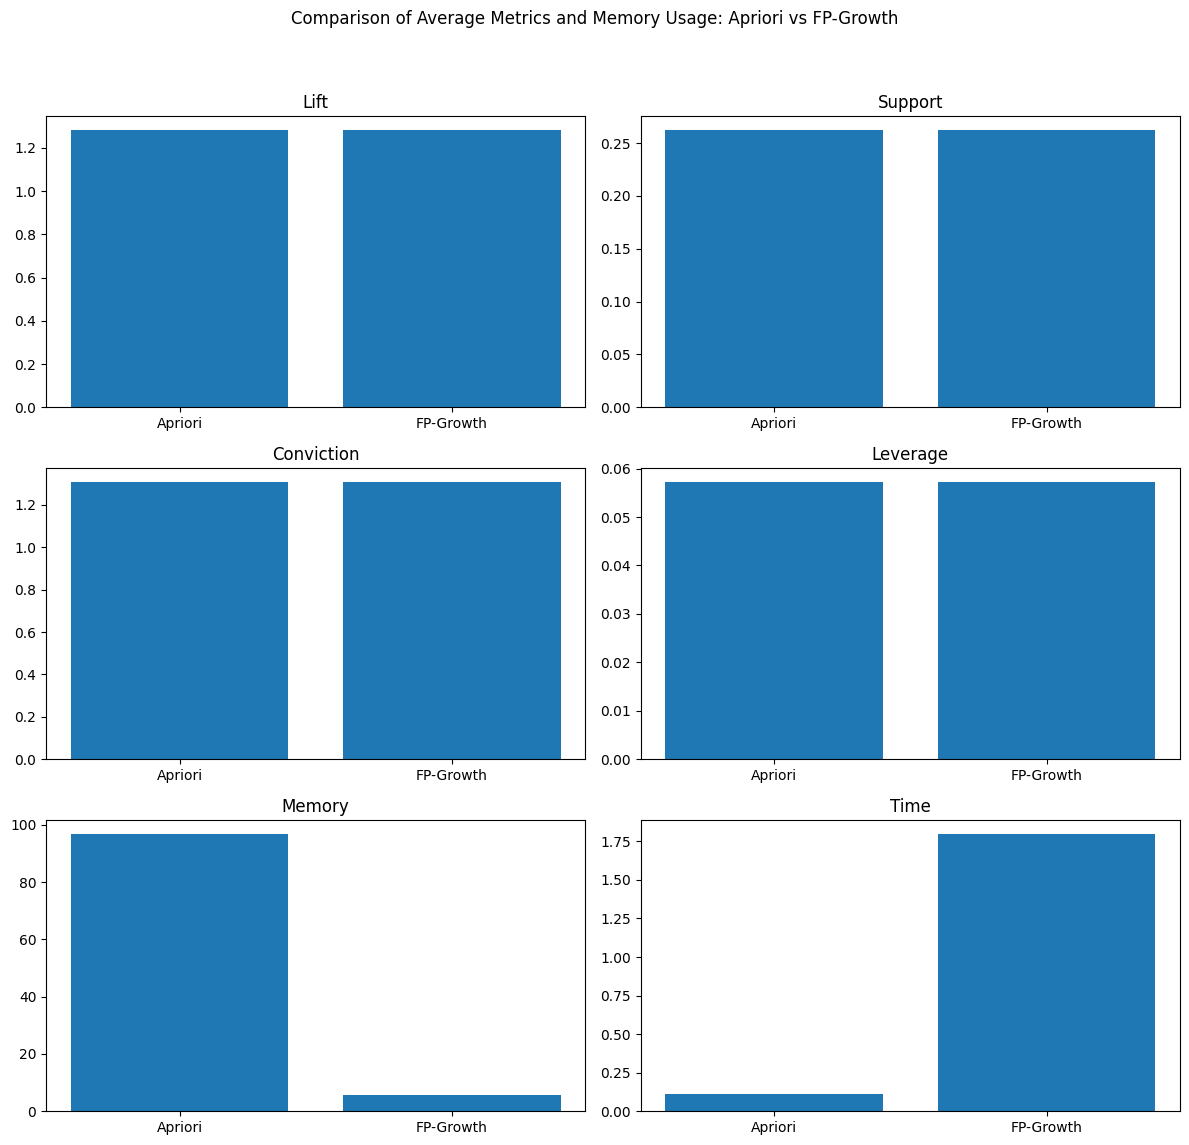

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori: 23 itemsets, 10 rules, Time: 0.1529 seconds, Memory: 162.2503 MB
FP-Growth: 23 itemsets, 10 rules, Time: 3.6353 seconds, Memory: 22.0782 MB

Average Metrics:
Apriori
 lift          1.323809
support       0.261615
conviction    1.350583
leverage      0.063922
dtype: float64

FP-Growth
 lift          1.323809
support       0.261615
conviction    1.350583
leverage      0.063922
dtype: float64


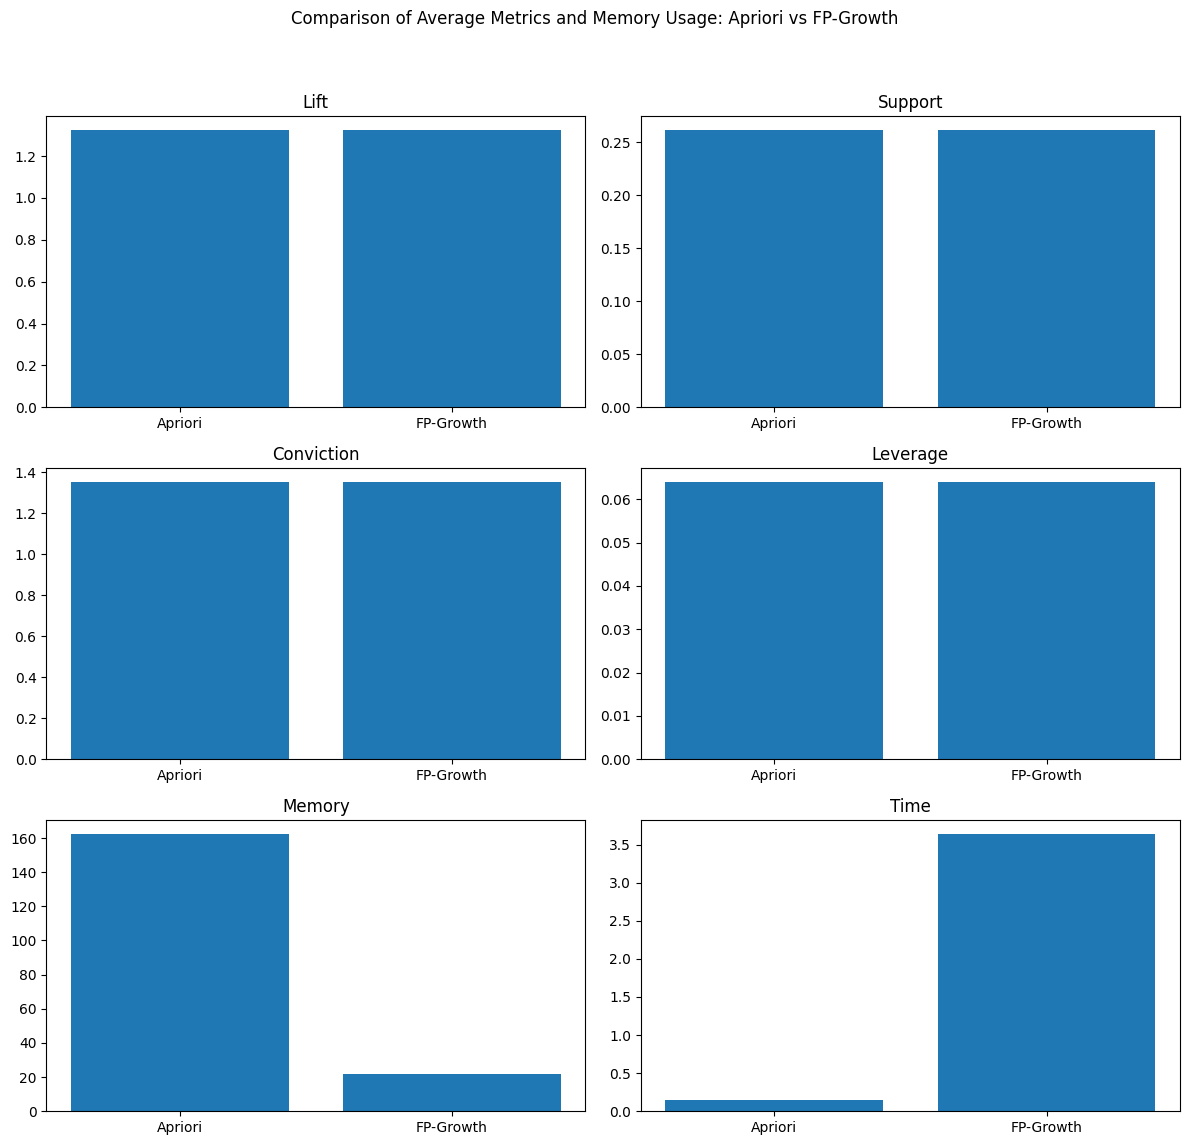

In [ ]:
# Assuming preprocessing is done and `food_purchase_data`, `non_food_purchase_data`, `drink_purchase_data` are ready
compare_and_visualize_mba_algorithms(food_purchase_data, min_support=0.5, min_confidence=0.4)
compare_and_visualize_mba_algorithms(non_food_purchase_data, min_support=0.25, min_confidence=0.3)
compare_and_visualize_mba_algorithms(drink_purchase_data, min_support=0.25, min_confidence=0.3)

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes
import pandas as pd

# Assuming `data` is your DataFrame including 'Country' and it's already preprocessed for binary encoding

# Function to apply K-Modes clustering to a given category
def apply_kmodes(data, category_columns):
    X = data[category_columns]
    km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(X)
    return clusters

# Applying K-Modes for each category
data['Food_Cluster'] = apply_kmodes(data, food_columns)
data['Non_Food_Cluster'] = apply_kmodes(data, non_food_columns)
data['Drink_Cluster'] = apply_kmodes(data, drink_columns)

# Example: Analyzing food clusters by country
food_cluster_country_distribution = data.groupby(['Food_Cluster', 'Country']).size().unstack(fill_value=0)
print(food_cluster_country_distribution)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18949, cost: 380073.0
Run 1, iteration: 2/100, moves: 2401, cost: 380073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 26240, cost: 349674.0
Run 2, iteration: 2/100, moves: 229, cost: 349674.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 25931, cost: 364889.0
Run 3, iteration: 2/100, moves: 7607, cost: 364889.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 23909, cost: 377072.0
Run 4, iteration: 2/100, moves: 5192, cost: 374704.0
Run 4, iteration: 3/100, moves: 1008, cost: 374704.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 27084, cost: 365326.0
Run 5, iteration: 2/100, moves: 1516, cost: 365326.0
Best run was 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


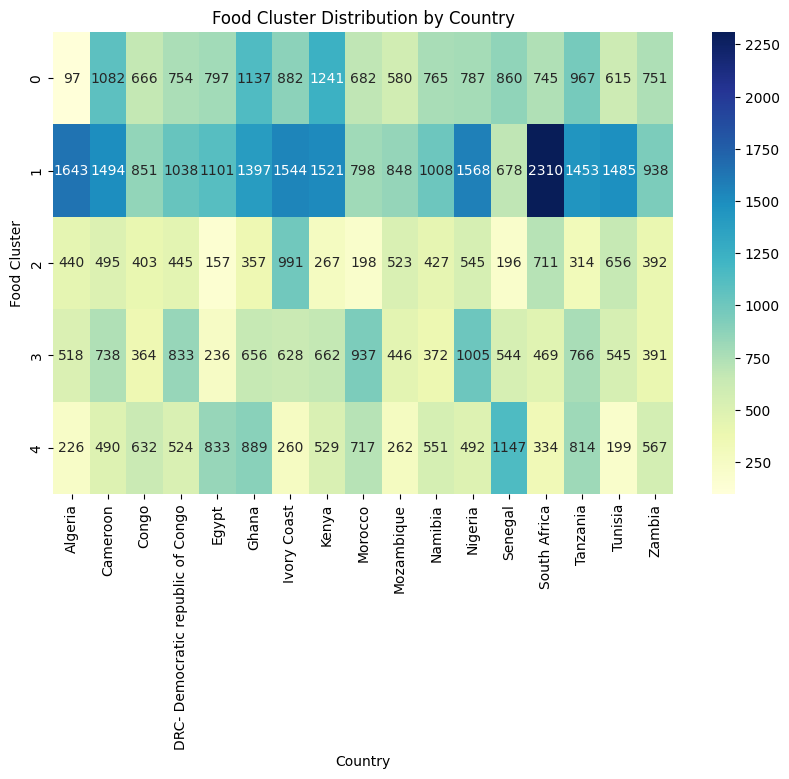

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(food_cluster_country_distribution, annot=True, cmap="YlGnBu", fmt="g")
plt.title('Food Cluster Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Food Cluster')
plt.show()

In [ ]:

# Example: Analyzing non -food clusters by country
non_food_cluster_country_distribution = data.groupby(['Non_Food_Cluster', 'Country']).size().unstack(fill_value=0)
print(non_food_cluster_country_distribution)


Country           Algeria  Cameroon  Congo  DRC- Democratic republic of Congo  \
Non_Food_Cluster                                                                
0                    2321      2141   1193                               1266   
1                     191       382    212                                600   
2                     147      1001    894                                633   
3                     132       388    423                                853   
4                     133       387    194                                242   

Country           Egypt  Ghana  Ivory Coast  Kenya  Morocco  Mozambique  \
Non_Food_Cluster                                                          
0                  1301   2104         2660   1862      923        1791   
1                   229    280          502    342      571         222   
2                  1062   1382          367    971     1222         217   
3                   360    546          444    768      4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Example: Analyzing drink clusters by country
drink_cluster_country_distribution = data.groupby(['Drink_Cluster', 'Country']).size().unstack(fill_value=0)
print(drink_cluster_country_distribution)

Country        Algeria  Cameroon  Congo  DRC- Democratic republic of Congo  \
Drink_Cluster                                                                
0                  417      1062    728                               1336   
1                  468       803    514                                485   
2                 1502      1738   1063                               1036   
3                  400       577    515                                588   
4                  137       119     96                                149   

Country        Egypt  Ghana  Ivory Coast  Kenya  Morocco  Mozambique  Namibia  \
Drink_Cluster                                                                   
0               1022   1154         1289   1415      996         780      798   
1                514    866          695    782      543         519      666   
2               1002   1668         1380   1226     1135         878      970   
3                448    602          732    658 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Function to find top frequent itemsets for a given category in a specific country
def find_top_frequent_itemset_by_country_and_category(data, country, category_columns, min_support):
    print(f"Analysis for {country}, Category: {', '.join(category_columns[:3])}...")  # Shortened for display
    # Filter data for the specific country and category columns
    country_category_data = data[data['Country'] == country][category_columns]

    # Generate frequent itemsets
    frequent_itemsets = apriori(country_category_data, min_support=min_support, use_colnames=True)
    frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

    # Display the frequent itemsets
    print(frequent_itemsets_sorted.head(1))

# Assuming `data` includes binary-encoded product columns and a 'Country' column
# Assuming min_support values are as follows: 0.5 for food, 0.25 for non-food and drinks

# Running the analysis for each country and each category
for country in data['Country'].unique():
    find_top_frequent_itemset_by_country_and_category(data, country, food_columns, 0.5)
    find_top_frequent_itemset_by_country_and_category(data, country, non_food_columns, 0.25)
    find_top_frequent_itemset_by_country_and_category(data, country, drink_columns, 0.25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis for DRC- Democratic republic of Congo, Category: Breakfast Cereal, Flour, Pasta...
    support itemsets
7  0.968559   (Eggs)
Analysis for DRC- Democratic republic of Congo, Category: Dishwashing liquid, Dishwasher detergent, General cleaning bar soap...
    support     itemsets
7  0.625487  (Bath soap)
Analysis for DRC- Democratic republic of Congo, Category: Tea, Coffee, Fruit juice...
    support       itemsets
2  0.507791  (Fruit juice)
Analysis for Cameroon, Category: Breakfast Cereal, Flour, Pasta...
    support       itemsets
3  0.968597  (Dried beans)
Analysis for Cameroon, Category: Dishwashing liquid, Dishwasher detergent, General cleaning bar soap...
    support     itemsets
7  0.475459  (Bath soap)
Analysis for Cameroon, Category: Tea, Coffee, Fruit juice...
     support itemsets
13  0.453826   (Beer)
Analysis for Zambia, Category: Breakfast Cereal, Flour, Pasta...
    support       itemsets
2  0.939125  (Dried beans)
Analysis for Zambia, Category: Dishwashing liqui

### KModes Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20622, cost: 362328.0
Run 1, iteration: 2/100, moves: 4550, cost: 362328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 26666, cost: 364840.0
Run 2, iteration: 2/100, moves: 6905, cost: 354617.0
Run 2, iteration: 3/100, moves: 6789, cost: 351014.0
Run 2, iteration: 4/100, moves: 1636, cost: 351014.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 23645, cost: 353847.0
Run 3, iteration: 2/100, moves: 14909, cost: 347291.0
Run 3, iteration: 3/100, moves: 6609, cost: 345478.0
Run 3, iteration: 4/100, moves: 488, cost: 345478.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 26434, cost: 352399.0
Run 4, iteration: 2/100, moves: 2391, cost: 352399.0
Init: initializing centroids
Init: initi

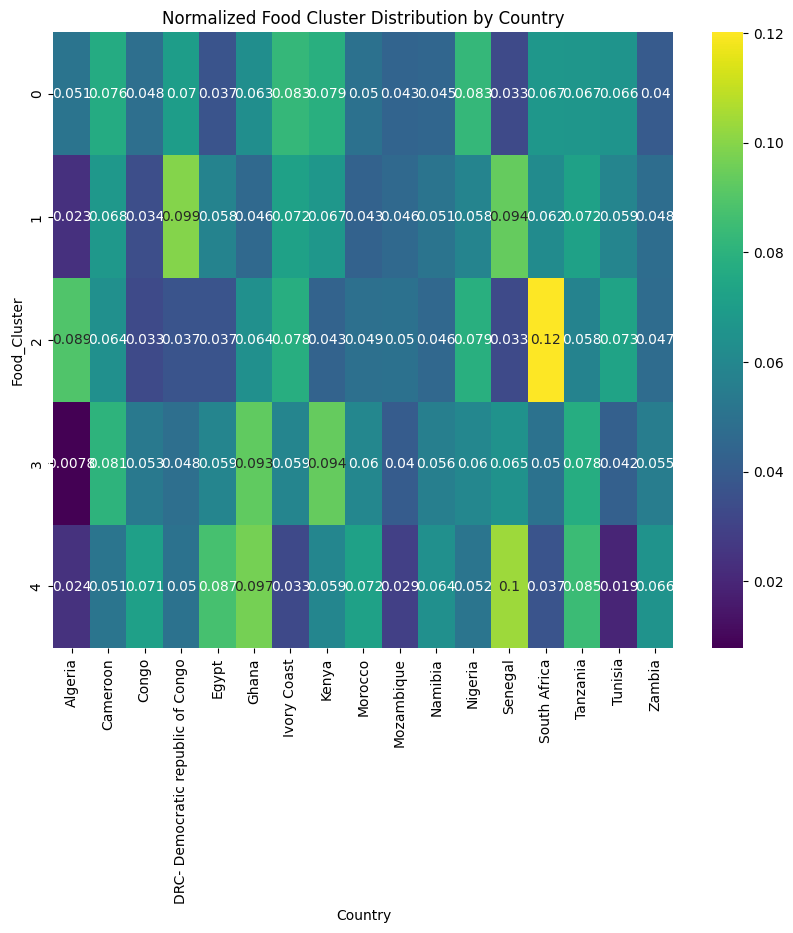

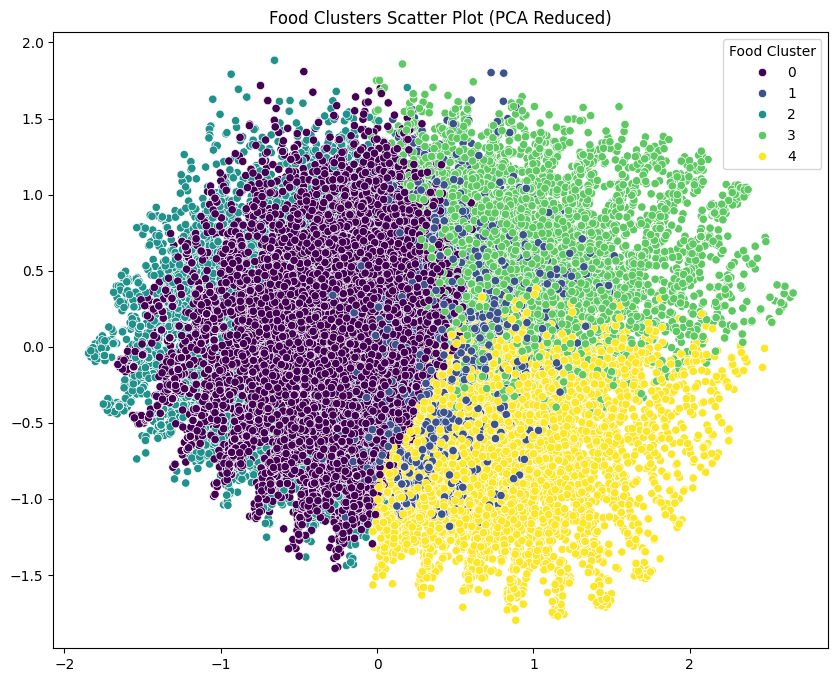

Cluster centroids (modes):
 [[False  True False False False False False False  True False False False
  False False False False False False False False False False  True  True
  False False False False False False False False  True False False]
 [False  True  True False  True  True  True False  True False False  True
   True False False False False False False False False False  True  True
  False False False False False False False False  True False False]
 [False False False False False False False False  True False False False
  False False False False False False False False False False  True  True
  False False False False False False False False  True False False]
 [ True  True  True  True  True  True False False  True  True  True  True
   True False False False False False False False False False  True  True
   True  True  True False False False False False  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True False  True False Fals

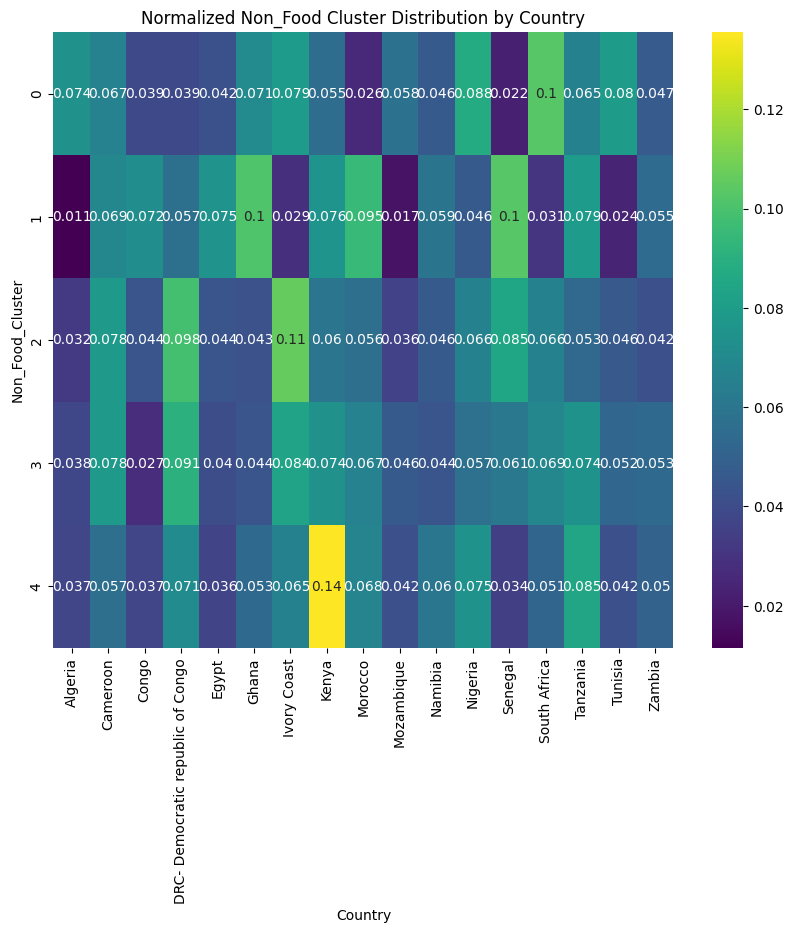

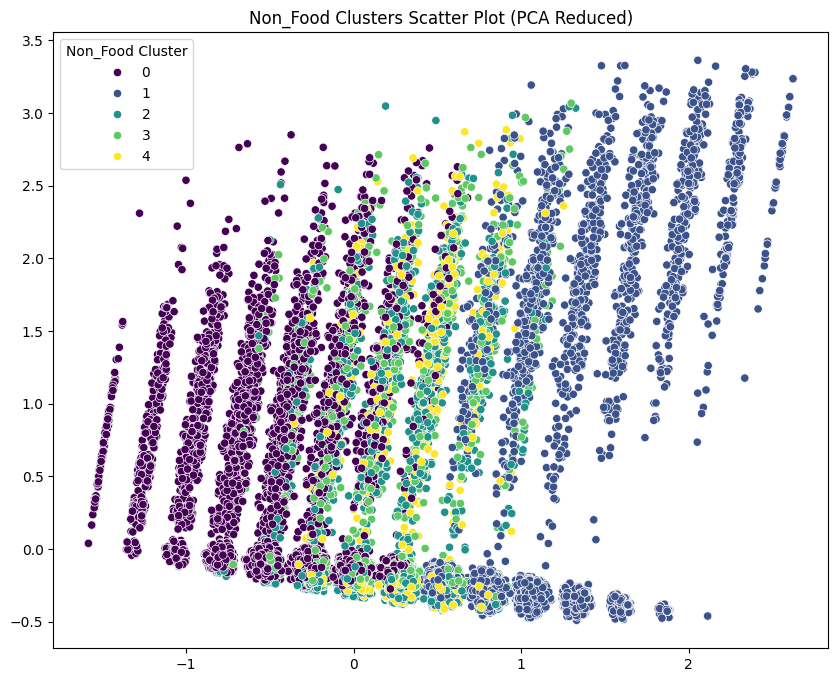

Cluster centroids (modes):
 [[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False]
 [False False  True False False False False  True  True  True  True  True
   True False False  True False  True False  True  True False False False
  False  True False  True  True]
 [False False False False False False False False  True False False  True
  False False False  True False False False False False False False False
  False  True False  True False]
 [False False False False False False False False False  True False  True
   True False False False False False False  True False False False False
  False  True False False False]
 [False False False False False False False False  True  True False False
  False False False  True False False False  True  True False False False
  False False False  True False]]

Cluster 0:

Cluster 1:
General cleaning bar soap: True
Shower cle

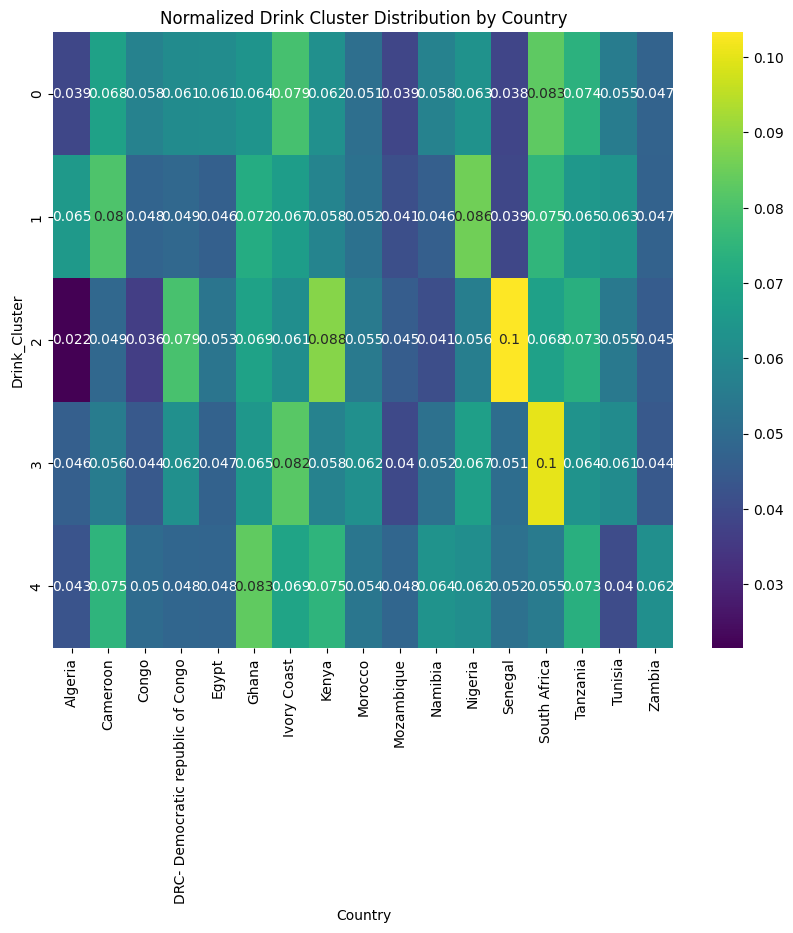

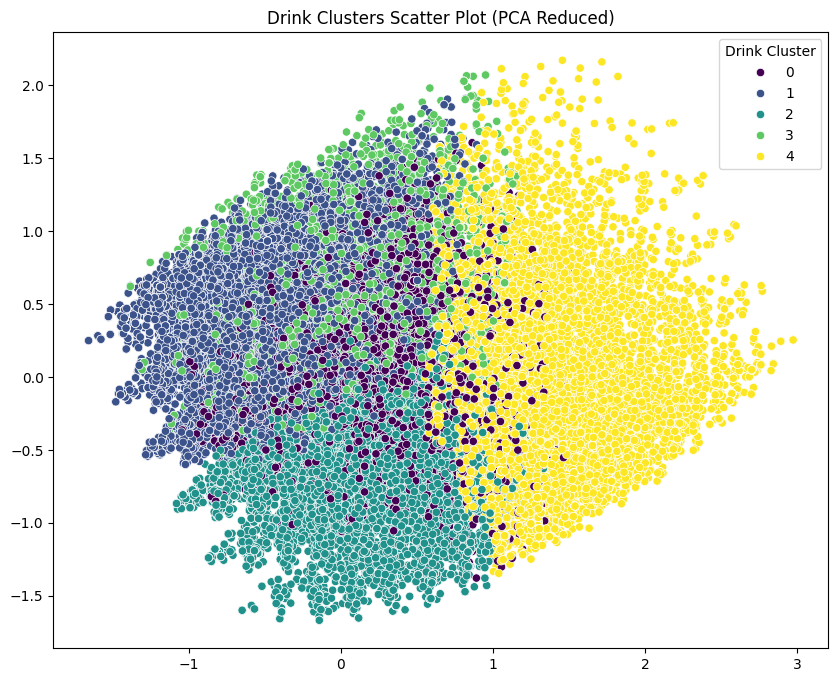

Cluster centroids (modes):
 [[ True  True  True False False False  True False False False False False
   True False False False False  True False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False]
 [ True  True  True  True  True False False False False False False False
  False False False False False False False False False False False]
 [False False False False  True False False False False False False False
  False False False False False False False False  True False  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True False False  True  True  True  True False False False]]

Cluster 0:
Tea: True
Coffee: True
Fruit juice: True
Diet soft drinks: True
Wine: True
Brandy: True

Cluster 1:

Cluster 2:
Tea: True
Coffee: True
Fruit juice: True
Bottled water: True
Milk: True

Cluster 3:
Milk: True
Rum: True
Cream Liqueurs : True

Clus

In [ ]:
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame including 'Country' and it's already preprocessed for binary encoding

def analyze_and_label_clusters(km, category_columns):
    # Display the cluster centroids
    centroids = km.cluster_centroids_
    print("Cluster centroids (modes):\n", centroids)

    cluster_labels = []  # Initialize cluster_labels to ensure it's defined
    for i, centroid in enumerate(centroids):
        print(f"\nCluster {i}:")
        cluster_label = []  # Initialize an empty list for this cluster's labels
        for feature, category in zip(category_columns, centroid):
            if category:  # Adjust based on your data; assuming '1' for presence
                cluster_label.append(feature)
                print(f"{feature}: {category}")
        cluster_labels.append(' | '.join(cluster_label))  # Joining feature labels with '|'

    return cluster_labels

def apply_kmodes_and_visualize(data, category_columns, category_name):
    X = data[category_columns]
    km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(X)

    print(f'Cost for {category_name} clusters:', km.cost_)
    data[f'{category_name}_Cluster'] = clusters

    cluster_country_distribution = data.groupby([f'{category_name}_Cluster', 'Country']).size().unstack(fill_value=0)
    normalized_distribution = cluster_country_distribution.div(cluster_country_distribution.sum(axis=1), axis=0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(normalized_distribution, annot=True, cmap='viridis')
    plt.title(f'Normalized {category_name} Cluster Distribution by Country')
    plt.show()

    pca = PCA(n_components=2)
    cluster_coordinates = pca.fit_transform(X)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=cluster_coordinates[:, 0], y=cluster_coordinates[:, 1], hue=data[f'{category_name}_Cluster'], palette='viridis')
    plt.title(f'{category_name} Clusters Scatter Plot (PCA Reduced)')
    plt.legend(title=f'{category_name} Cluster')
    plt.show()

    cluster_labels = analyze_and_label_clusters(km, category_columns)
    return clusters, cluster_labels

# Predefined columns for each category
food_columns = ['Breakfast Cereal', 'Flour', 'Pasta', 'Noodles', 'Rice', 'Bread', 'Rolls or Pastries',
    'Ready-to-make baked goods ', 'Traditional staple foods', 'Spices and Seasonings', 'Cooking oil',
    'Fresh fruits', 'Fresh vegetables', 'Canned fruit', 'Canned vegetables', 'Frozen fruit',
    'Frozen vegetables', 'Canned tomatoes', 'Canned beans', 'Baked beans', 'Canned peas',
    'Canned chickpeas or lentils', 'Dried beans', 'Dried peas or lentils', 'Fresh red meat ',
    'Fresh poultry ', 'Fresh fish', 'Frozen meat', 'Frozen fish', 'Seafood', 'Canned meat',
    'Canned fish', 'Eggs', 'Cheese', 'Yoghurt']
non_food_columns = ['Dishwashing liquid', 'Dishwasher detergent', 'General cleaning bar soap', 'Floor cleaner (liquid)',
    'Floor cleaner (wax)', 'Carpet cleaner', 'Furniture cleaner', 'Shower cleaner', 'Toilet paper',
    'Toilet cleaner', 'Laundry detergent ', 'Bleach', 'Air Freshener', 'Hand sanitizer', 'Hand wash',
    'Bath soap', 'Body wash', 'Deodorant', 'Antiperspirant', 'Body lotion', 'Petroleum Jelly',
    'Facial cleanser', 'Face cream', 'Eye cream', 'Sunscreen', 'Perfume', 'Lipgloss', 'Toothpaste',
    'Mouthwash']
drink_columns = ['Tea', 'Coffee', 'Fruit juice', 'Bottled water', 'Milk',
    'Carbonated soft drinks', 'Diet soft drinks', 'Iced tea drinks', 'Energy drinks', 'Sports drinks',
    'Smoothies', 'Concentrated juice', 'Wine', 'Beer', 'Ciders', 'Champagne/Sparkling wine', 'Vodka',
    'Brandy', 'Whisky', 'Gin', 'Rum', 'Tequila', 'Cream Liqueurs ']
# Applying K-Modes and visualization for each category, and analyzing the clusters
for category_name, category_columns in zip(['Food', 'Non_Food', 'Drink'],
                                           [food_columns, non_food_columns, drink_columns]):
    _, cluster_labels = apply_kmodes_and_visualize(data, category_columns, category_name)
    print(f"{category_name} cluster labels:", cluster_labels)
